In [31]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.style.use(r"C:\Users\dan20\OneDrive - Johann Wolfgang Goethe Universität\Module\Masterarbeit\daniels_custom_stylesheet.matplotlibrc")
DPI=350

In [32]:
# Load the dictionary from file
loaded_params = np.load("params.npz")

# Convert to regular Python dict (optional)
params = {k: loaded_params[k].item() if loaded_params[k].shape == () else loaded_params[k] for k in loaded_params}

# Set variables from dictionary explicitly
wl_TPA = params["wl_TPA"]
wl_ill = params["wl_ill"]
wl_det = params["wl_det"]
wl_p = params["wl_p"]
wl_S = params["wl_S"]
num_ap = params["num_ap"]
ref_index = params["ref_index"]
M = params["M"]
pinhole_radius_airy = params["pinhole_radius_airy"]
pinhole_radius = params["pinhole_radius"]
ap_durch_f = params["ap_durch_f"]
r_min = params["r_min"]
r_max = params["r_max"]
r_num = params["r_num"]
z_min = params["z_min"]
z_max = params["z_max"]
z_num = params["z_num"]
print(params)
r_array=np.linspace(0,r_max,int(r_num/2+1))
z_array=np.linspace(z_min,z_max,z_num)
theta_num=360
theta_array = np.linspace(0,360,theta_num)

#plotting 
boxprops=dict(boxstyle='square', facecolor='white', alpha=0.7)

{'wl_TPA': 0.9, 'wl_ill': 0.488, 'wl_det': 0.52, 'wl_p': 0.797, 'wl_S': 1.031, 'num_ap': 1.2, 'ref_index': 1.33, 'M': 63, 'pinhole_radius_airy': 1, 'pinhole_radius': 0.2643333333333333, 'ap_durch_f': 2.0924221527184677, 'r_min': -4, 'r_max': 4, 'r_num': 901, 'z_min': -3, 'z_max': 3, 'z_num': 801}


In [33]:
def calculate_resolutions(psf):
    FWHM_lateral = 2*r_array[np.isclose(psf[:,int(z_num/2)], 0.5, 0.04)][0]
    FWHM_axial = 2*z_array[np.isclose(psf[0,:], 0.5, 0.04)][-1]
    integrated_intensity = sp.integrate.simpson(psf*r_array[:,np.newaxis],dx=(r_max-r_min)/r_num,axis=0)
    integrated_intensity=integrated_intensity/np.max(integrated_intensity)
    try:
        optical_section_thickness = 2*z_array[np.isclose(integrated_intensity, 0.5, 0.04)][-1]
    except IndexError:
        optical_section_thickness = np.NaN
    print(r'Lateral Resolution (FWHM): %.2f um' % (FWHM_lateral, ))
    print(r'Axial Resolution (FWHM): %.2f um' % (FWHM_axial, ))
    print(r'Optical Section Thickness: %.2f um' % (optical_section_thickness, ))

In [34]:
def spot_size(z,w0=1,zR=2):
    return w0*(np.sqrt(1+(z/zR)**2))
def gaussian_beam(r,z,w0=0.3,zR=1):
    return np.exp(-2*r[:,np.newaxis]**2/spot_size(z[np.newaxis,:],w0=w0,zR=zR)**2)
def bessel_beam(r):
    return sp.special.j0(r)**2

In [35]:
PSF_conventional = np.loadtxt(f'psf_conventional.csv', delimiter=',')[int(r_num/2):,:]
PSF_confocal = np.loadtxt(f'psf_confocal.csv', delimiter=',')[int(r_num/2):,:]
PSF_2p_conventional = np.loadtxt(f'psf_2p_conventional.csv', delimiter=',')[int(r_num/2):,:]
PSF_2p_confocal = np.loadtxt(f'psf_2p_confocal.csv', delimiter=',')[int(r_num/2):,:]
PSF_srs = np.loadtxt(f'psf_srs.csv', delimiter=',')[int(r_num/2):,:]

C:\Users\dan20\AppData\Local\Temp\ipykernel_17364\702967954.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


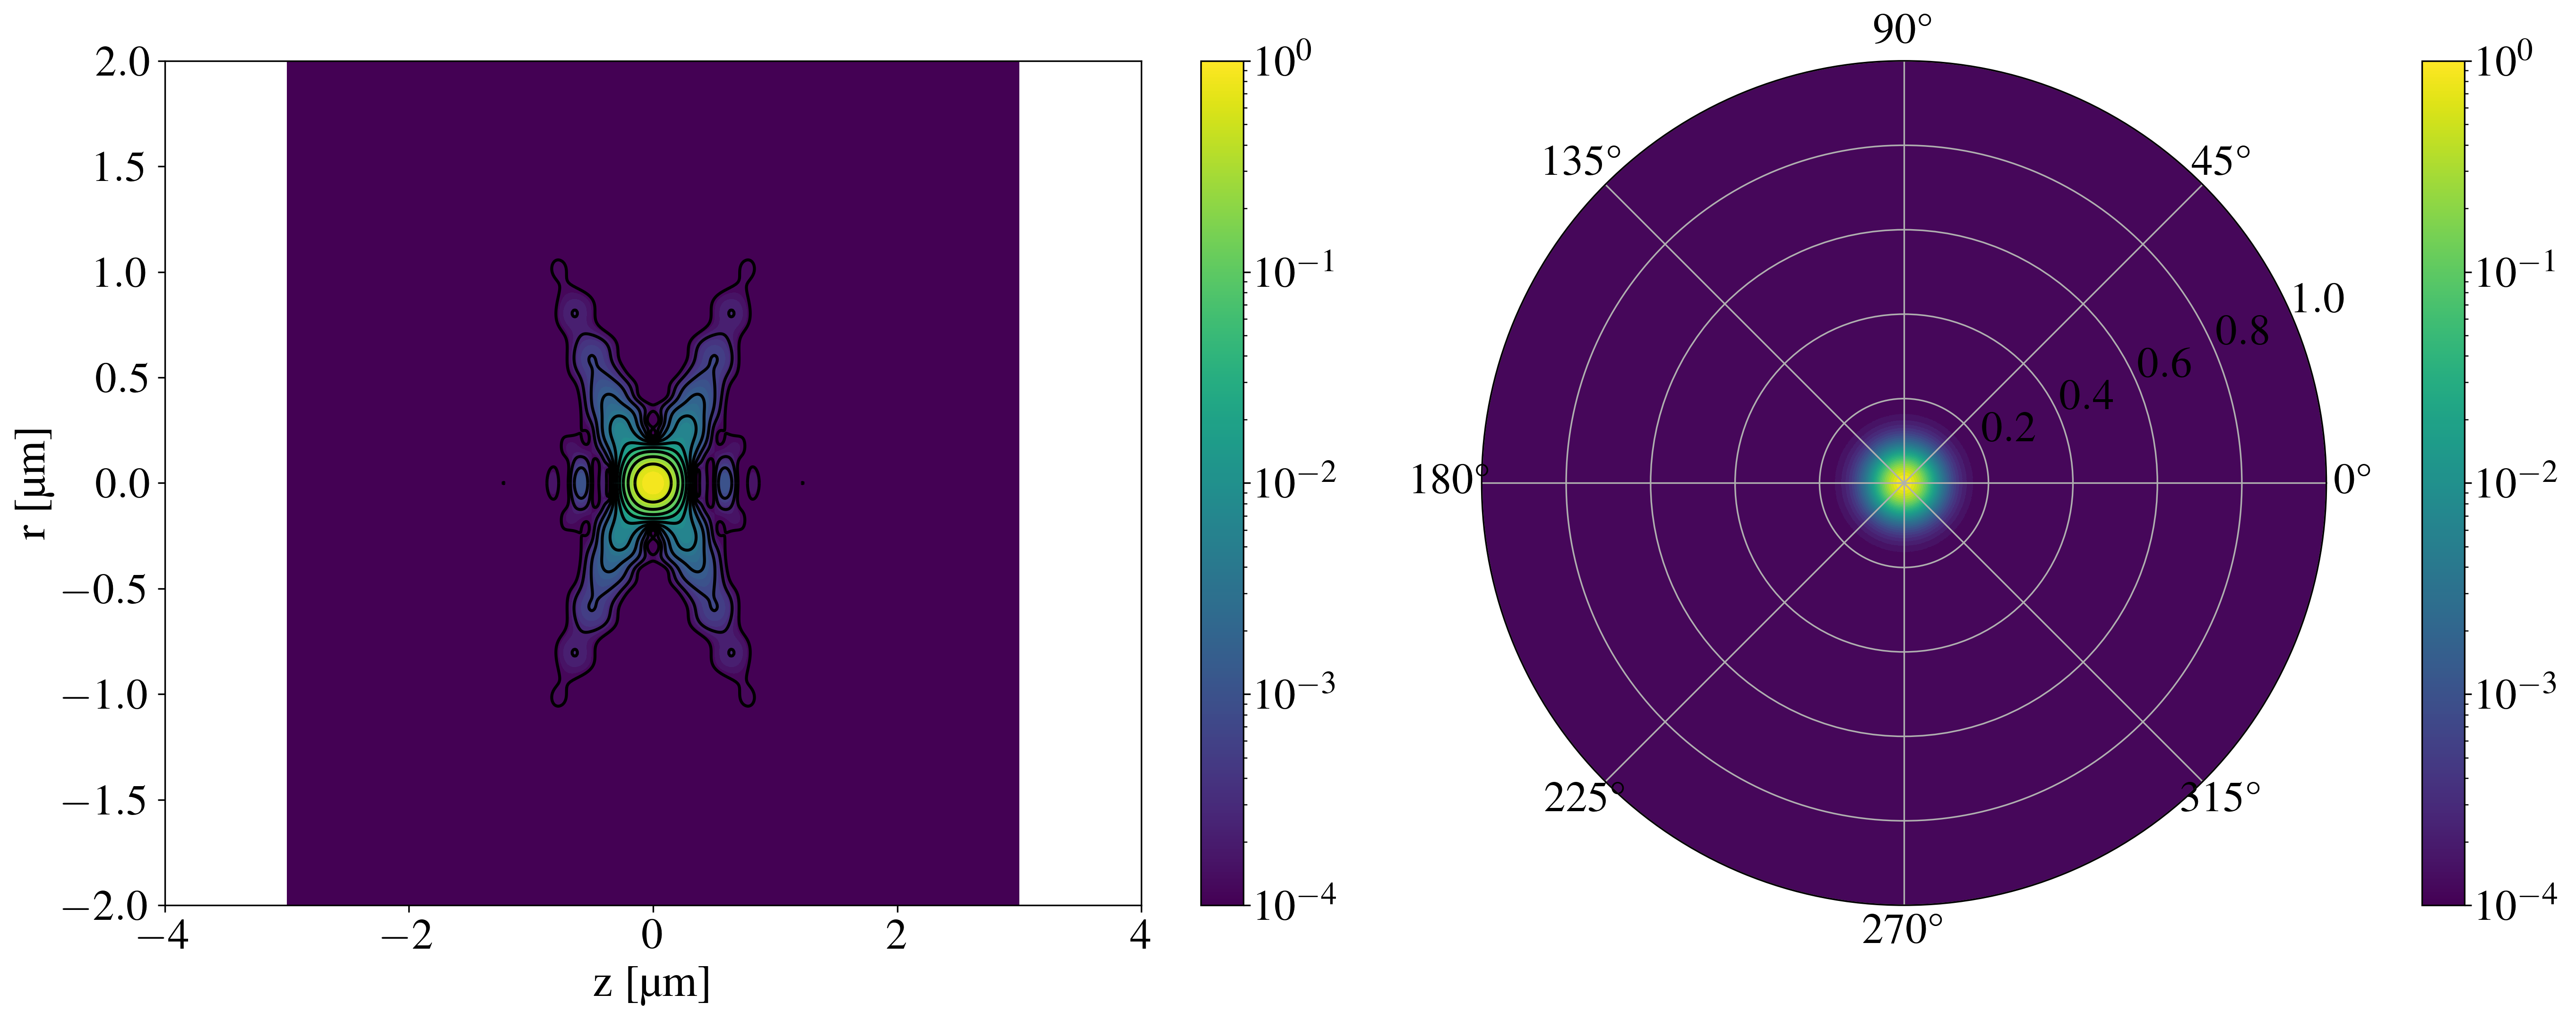

In [36]:
theta_num=360
theta_array = np.linspace(0,360,theta_num)
cmap_norm=mpl.colors.LogNorm(1e-4,1)
cmap=mpl.cm.viridis
contour_levels=np.geomspace(1e-4,1,num=11)
contourf_levels=np.geomspace(1e-4,1,num=31)
cmap=mpl.cm.viridis

fig, axs =plt.subplot_mosaic([['0','1']],per_subplot_kw={('1'):{'projection':'polar'},},layout='constrained',figsize=(18,7))
ax=axs['0']
ax.contourf(z_array, r_array, PSF_srs , levels=contourf_levels, cmap=cmap, norm=cmap_norm, extend='min')
ax.contourf(z_array, -r_array, PSF_srs , levels=contourf_levels, cmap=cmap, norm=cmap_norm, extend='min')
c1=ax.contour(z_array, r_array, PSF_srs, levels=contour_levels, colors='k', linestyles='-')
c2=ax.contour(z_array, -r_array, PSF_srs, levels=contour_levels, colors='k', linestyles='-')
ax.set_xlabel(r'z [\textmu m]')
ax.set_ylabel(r'r [\textmu m]')
ax.set_xlim([-4,4])
ax.set_ylim([-2,2])
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=cmap_norm, cmap=cmap),ax=ax, orientation='vertical', )

ax=axs['1']
ax.contourf(theta_array, r_array, np.tile(PSF_srs[:,int(z_num/2)],(theta_num,1)).T, levels=np.linspace(0,1,num=31),cmap=cmap,norm=mpl.colors.Normalize(0,1),extend='min')
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=cmap_norm, cmap=cmap),ax=ax, orientation='vertical', )
ax.set_ylim([0,1])
#fig.savefig(r'C:\Users\dan20\OneDrive - Johann Wolfgang Goethe Universität\Module\Masterarbeit\Tex Dokument\Abbildungen\PSF_srs.png', bbox_inches='tight')
fig.show()

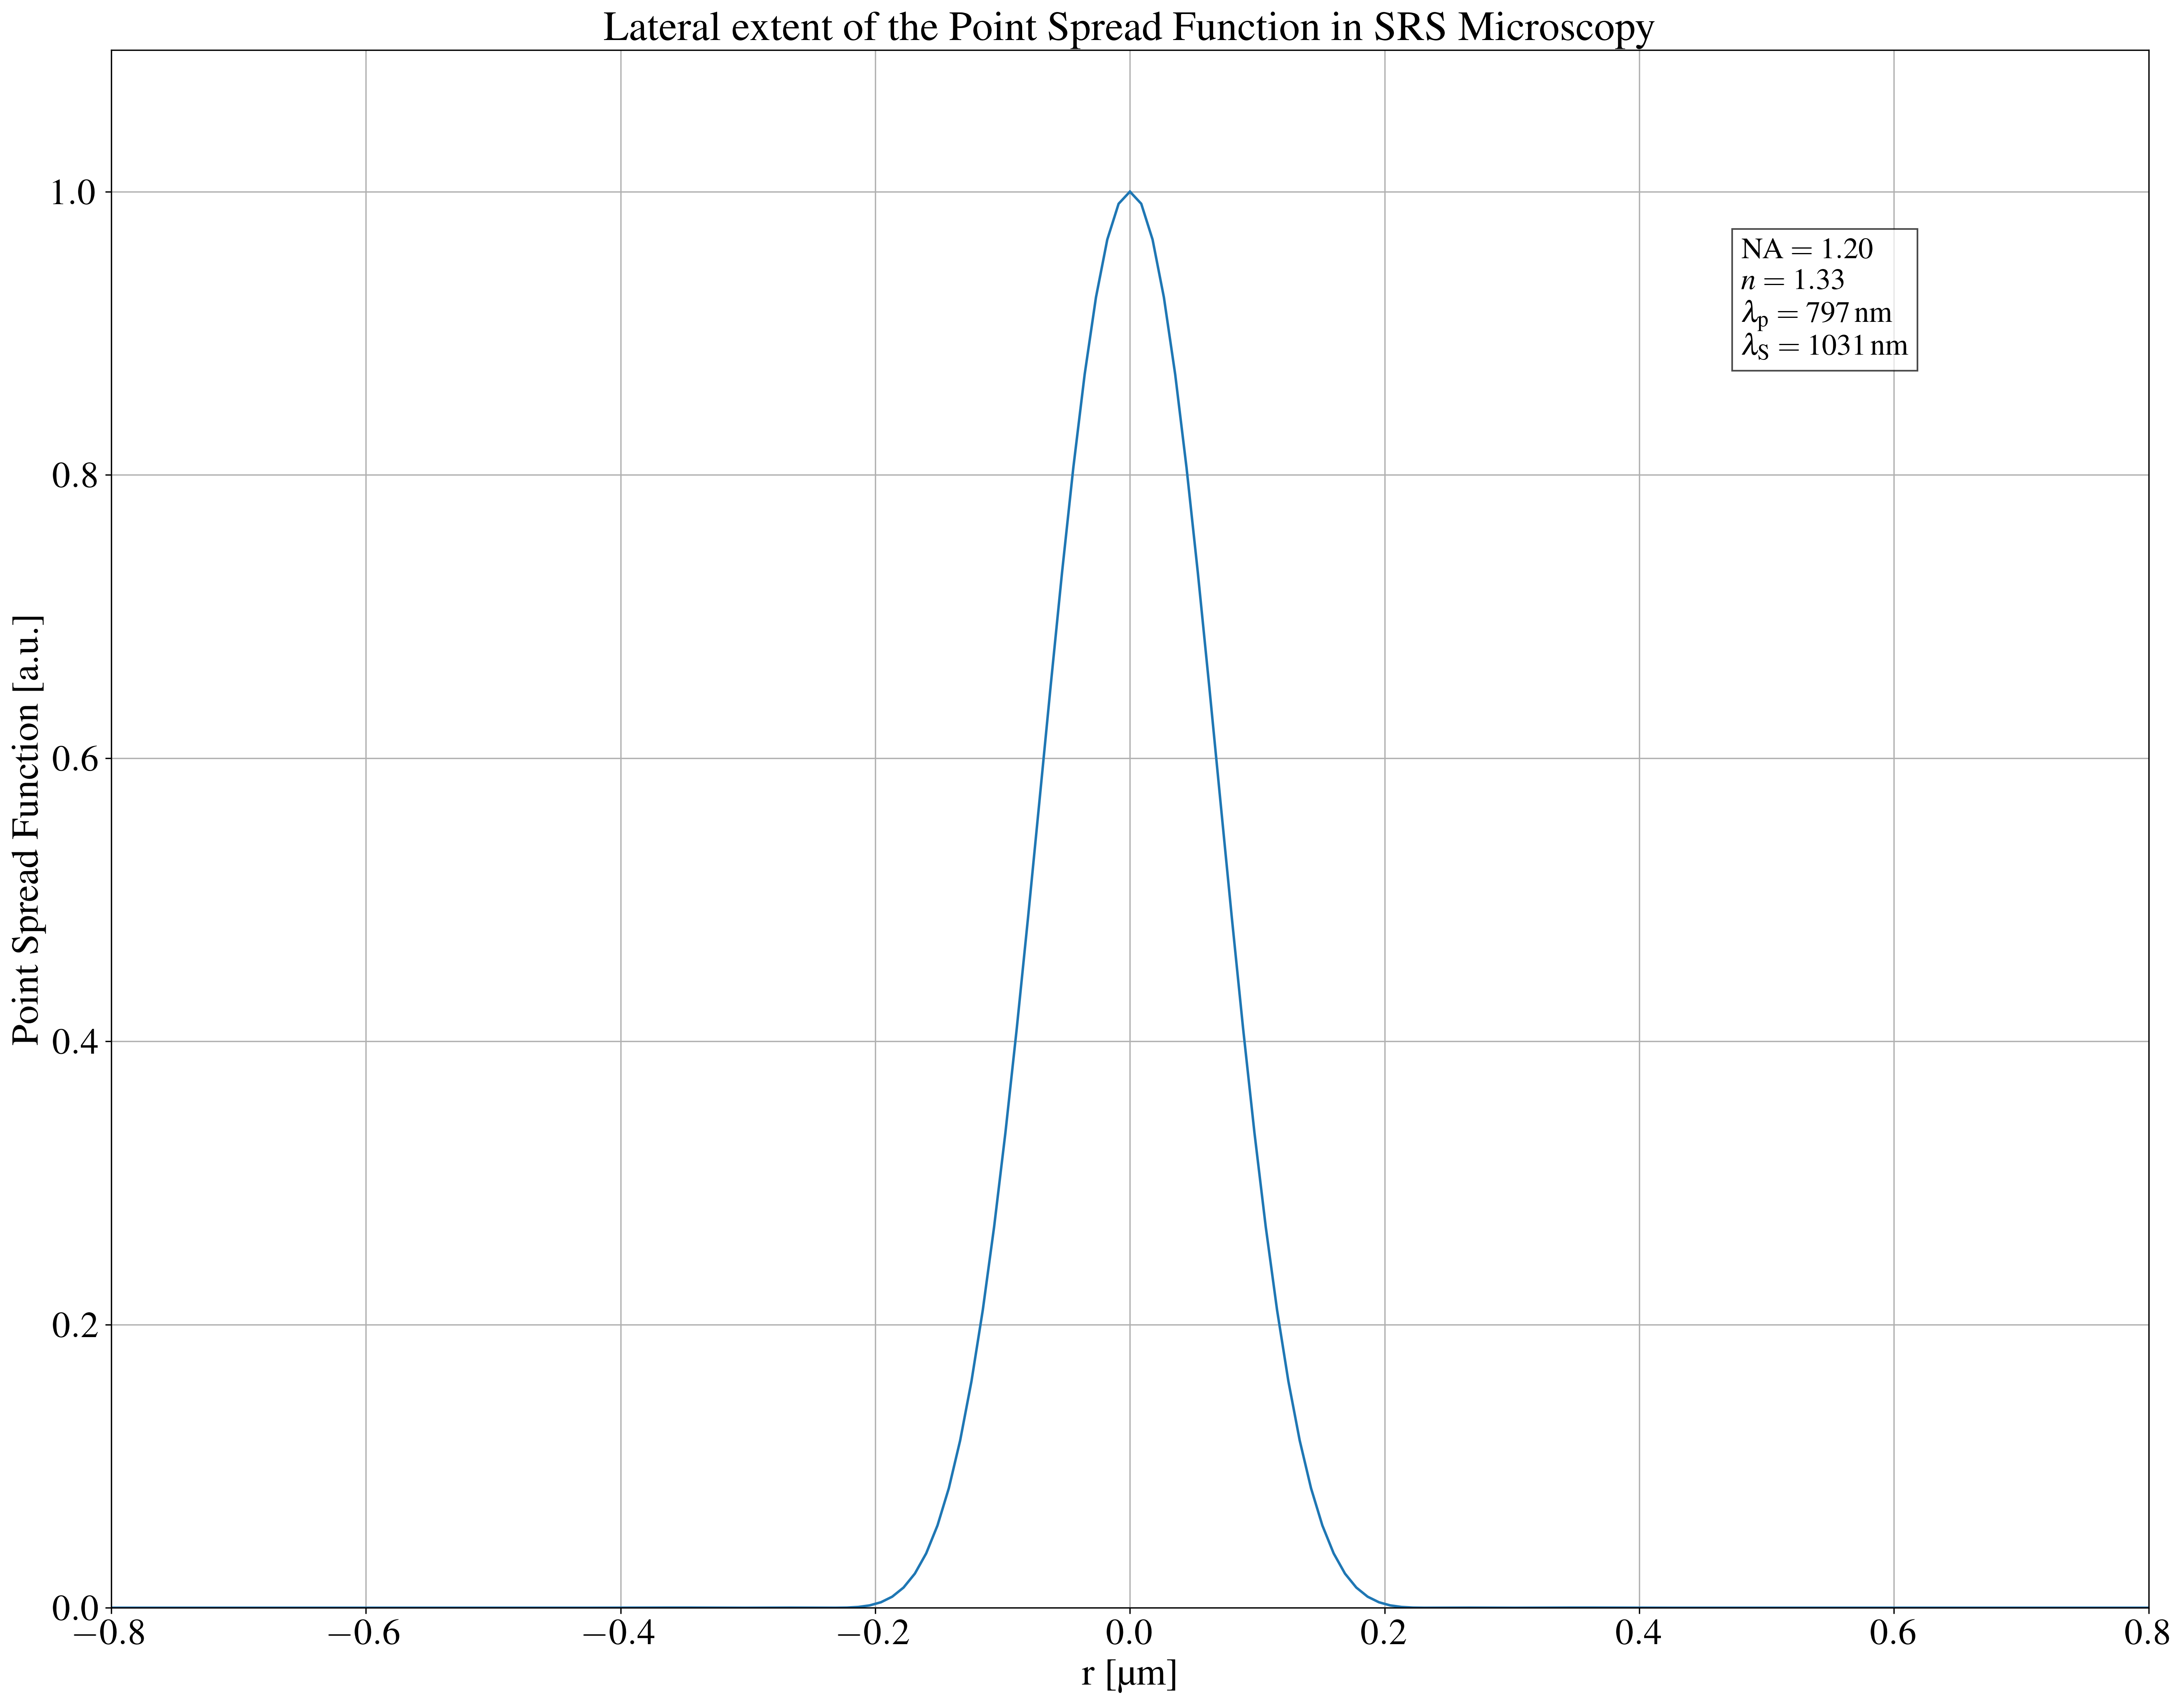

In [37]:
fig, ax =plt.subplots(figsize=(18,14),layout='constrained', frameon=True)
boxcontent = '\n'.join((
    r'$\mathrm{NA}=%.2f$' % (num_ap, ),
    r'$n=%.2f$' % (ref_index, ),
    r'$\lambda_{\mathrm{p}}=%.0f\,\mathrm{nm}$' % (wl_p*10**3, ),
    r'$\lambda_{\mathrm{S}}=%.0f\,\mathrm{nm}$' % (wl_S*10**3, )))

plt.text(0.8, 0.8, boxcontent, transform=ax.transAxes, fontsize=18,
        verticalalignment='bottom', bbox=boxprops)
#plt.hlines(0.5, xmin=-r_array[np.isclose(PSF_srs[:,int(z_num/2)], 0.5, 0.04)][-1], xmax=r_array[np.isclose(PSF_srs[:,int(z_num/2)], 0.5, 0.04)][-1], color='tab:red')
#plt.vlines(r_array[np.isclose(PSF_srs[:,int(z_num/2)], 0.5, 0.04)], ymin=0, ymax=1)
plt.plot(r_array, PSF_srs[:,int(z_num/2)], color='tab:blue')
plt.plot(-r_array, PSF_srs[:,int(z_num/2)], color='tab:blue')
plt.xlabel(r'r [\textmu m]')
plt.ylabel(r'Point Spread Function [a.u.]')
plt.title('Lateral extent of the Point Spread Function in SRS Microscopy')
plt.xlim(-0.8,0.8)
plt.ylim(0.0,1.1)
plt.grid(visible=True)
#fig.savefig('PSFs_zplane_integrated.svg',bbox_inches='tight')
#fig.savefig('PSFs_zplane_integrated.png',dpi=DPI,bbox_inches='tight')
plt.show()

In [38]:
z_planes_conventional=2*np.pi*sp.integrate.simpson(PSF_conventional*r_array[:,np.newaxis],dx=(r_max-r_min)/r_num,axis=0)
z_planes_conventional=z_planes_conventional/np.max(z_planes_conventional)
z_planes_confocal=2*np.pi*sp.integrate.simpson(PSF_confocal*r_array[:,np.newaxis],dx=(r_max-r_min)/r_num,axis=0)
z_planes_confocal=z_planes_confocal/np.max(z_planes_confocal)
z_planes_2p_conventional=2*np.pi*sp.integrate.simpson(PSF_2p_conventional*r_array[:,np.newaxis],dx=(r_max-r_min)/r_num,axis=0)
z_planes_2p_confocal=2*np.pi*sp.integrate.simpson(PSF_2p_confocal*r_array[:,np.newaxis],dx=(r_max-r_min)/r_num,axis=0)
z_planes_srs=2*np.pi*sp.integrate.simpson(PSF_srs*r_array[:,np.newaxis],dx=(r_max-r_min)/r_num,axis=0)
z_planes_srs=z_planes_srs/np.max(z_planes_srs)

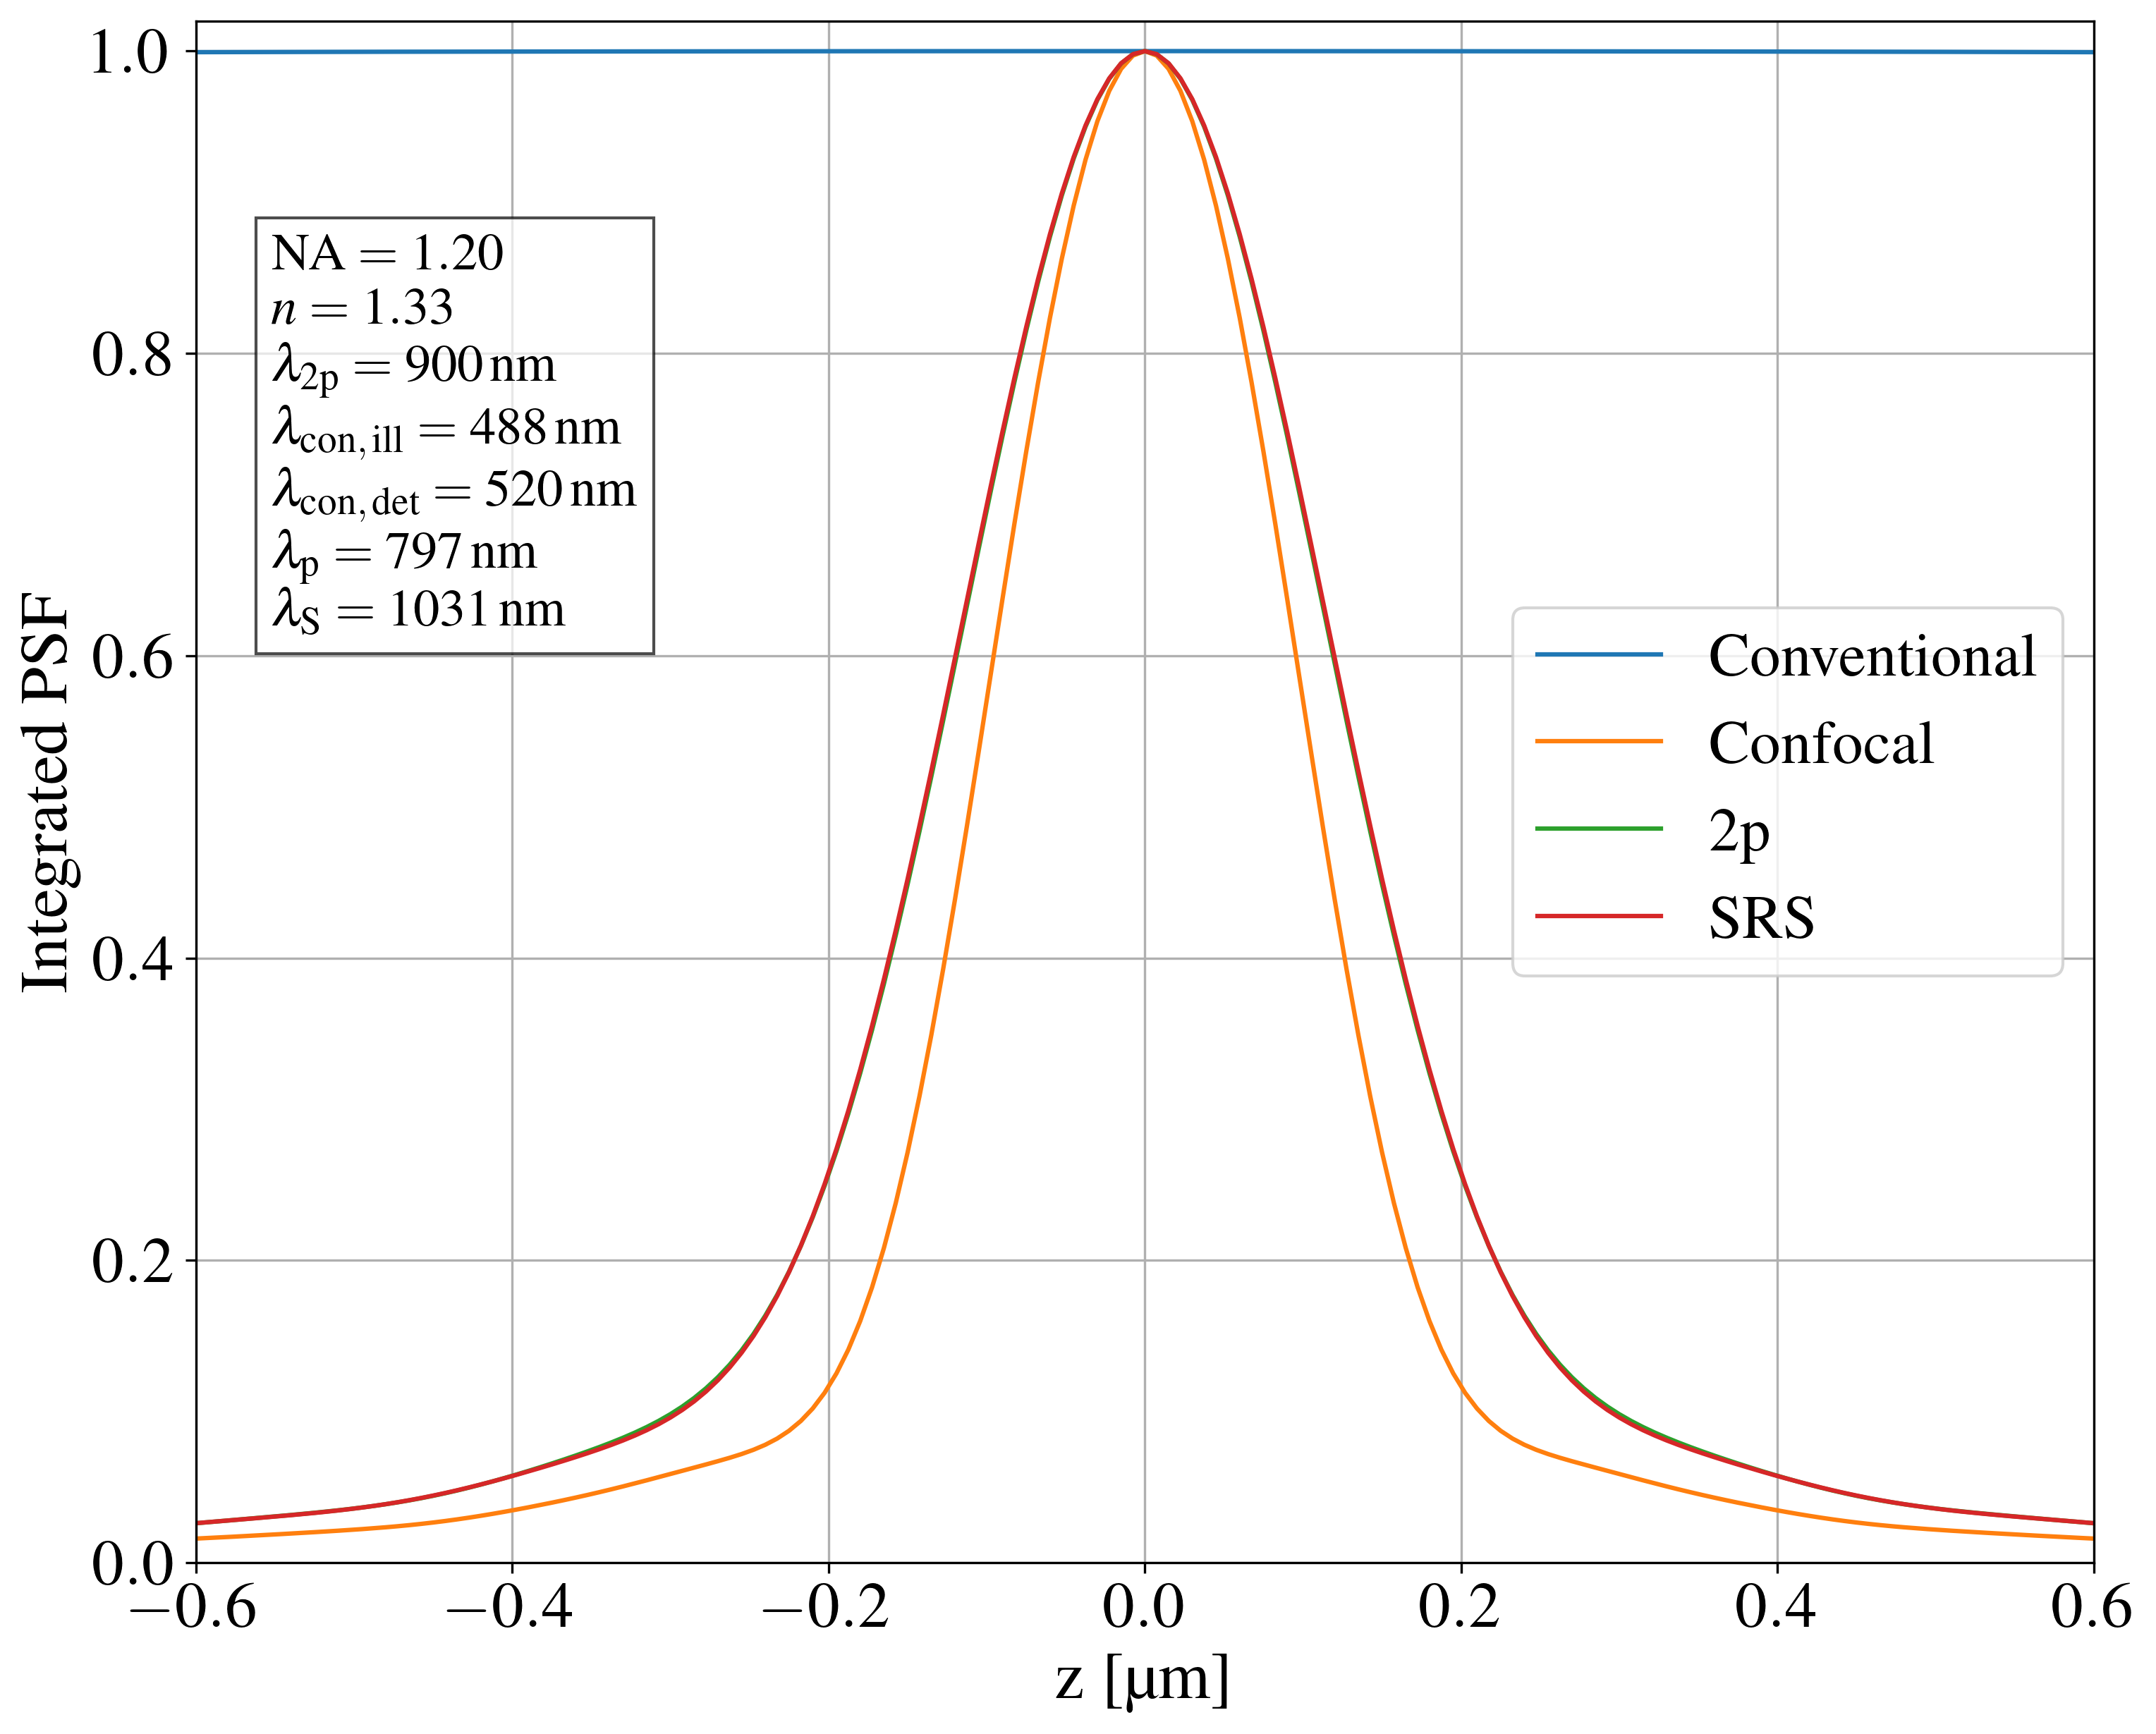

In [53]:
fig, ax =plt.subplots(figsize=(10,8),layout='constrained', frameon=True)

plt.plot(z_array,z_planes_conventional/np.max(z_planes_conventional),label='Conventional')
plt.plot(z_array,z_planes_confocal/np.max(z_planes_confocal),label='Confocal')
plt.plot(z_array,z_planes_2p_conventional/np.max(z_planes_2p_conventional),label='2p')
plt.plot(z_array,z_planes_srs/np.max(z_planes_srs),label='SRS')

plt.legend()
plt.xlabel(r'z [\textmu m]')
plt.ylabel(r'Integrated PSF')
boxcontent = '\n'.join((
    r'$\mathrm{NA}=%.2f$' % (num_ap, ),
    r'$n=%.2f$' % (ref_index, ),
    r'$\lambda_{\mathrm{2p}}=%.0f\,\mathrm{nm}$' % (wl_TPA*10**3, ),
    r'$\lambda_{\mathrm{con,\,ill}}=%.0f\,\mathrm{nm}$' % (wl_ill*10**3, ),
    r'$\lambda_{\mathrm{con,\,det}}=%.0f\,\mathrm{nm}$' % (wl_det*10**3, ),
    r'$\lambda_{\mathrm{p}}=%.0f\,\mathrm{nm}$' % (wl_p*10**3, ),
    r'$\lambda_{\mathrm{S}}=%.0f\,\mathrm{nm}$' % (wl_S*10**3, )))

ax.text(0.04, 0.6, boxcontent, transform=ax.transAxes, fontsize=18,
        verticalalignment='bottom', bbox=boxprops)
plt.xlim(-.6,.6)
plt.ylim(0,1.02)
plt.grid(visible=True)
#fig.savefig(r"C:\Users\dan20\OneDrive - Johann Wolfgang Goethe Universität\Module\Masterarbeit\Tex Dokument\Abbildungen\Sea_Response.pdf", bbox_inches='tight')
#fig.savefig('PSFs_zplane_integrated.png',dpi=DPI,bbox_inches='tight')
plt.show()

In [59]:
SRS_optical_section_thickness = 2*z_array[np.isclose(z_planes_srs/np.max(z_planes_srs), 0.5, 0.04)][-1]
print(r'SRS Optical Section Thickness: %.3f um' % (SRS_optical_section_thickness, ))

SRS Optical Section Thickness: 0.285 um


In [40]:
sea_response_confocal=sp.signal.convolve(z_planes_confocal,np.heaviside(np.linspace(-2,2,10000),0),mode='same')
sea_response_confocal=sea_response_confocal/np.max(sea_response_confocal)
sea_response_2p_conventional=sp.signal.convolve(z_planes_2p_conventional,np.heaviside(np.linspace(-2,2,10000),0),mode='same')
sea_response_2p_conventional=sea_response_2p_conventional/np.max(sea_response_2p_conventional)
sea_response_2p_confocal=sp.signal.convolve(z_planes_2p_confocal,np.heaviside(np.linspace(-2,2,10000),0),mode='same')
sea_response_2p_confocal=sea_response_2p_confocal/np.max(sea_response_2p_confocal)
sea_response_srs=sp.signal.convolve(z_planes_srs,np.heaviside(np.linspace(-2,2,10000),0),mode='same')
sea_response_srs=sea_response_srs/np.max(sea_response_srs)

In [41]:
def model_func_sea_response(x,*p):#richards curve
    return p[0]*(np.arctan((x+p[1])*p[2])+p[3])
    #return p[0]+(p[1]-p[0])/(1+p[2]*np.exp(-p[3]*(x-p[5])))**(1/p[4])#+p[6]*x
def model_func_absorption(x,*p):#richards curve
    return p[0]*(np.arctan((x+p[1])*p[2])+p[3])*(1-p[4]*x)

def chi_squared(z_array, samples, model_func, *p):
    return np.sum((samples - model_func(z_array, *p))**2)

In [42]:
initial_guess = np.array([1,1,1,1,1,0]) #initial guess for the parameters
bounds = sp.optimize.Bounds([0, 0,0,0,0,0], [np.inf]*6)

popt,pcov=sp.optimize.curve_fit(model_func_sea_response, z_array,sea_response_confocal,p0=initial_guess,bounds=(bounds.lb, bounds.ub))
print(popt)
reduced_chi_squared = chi_squared(z_array,sea_response_confocal,model_func_sea_response, *popt) / (len(sea_response_confocal) - len(popt))
print(f'reduced_chi_squared:{reduced_chi_squared}')

[3.24542651e-01 2.94040119e-22 1.40463371e+01 1.53872318e+00
 1.00000000e+00 1.00000000e-10]
reduced_chi_squared:2.558115147032779e-05


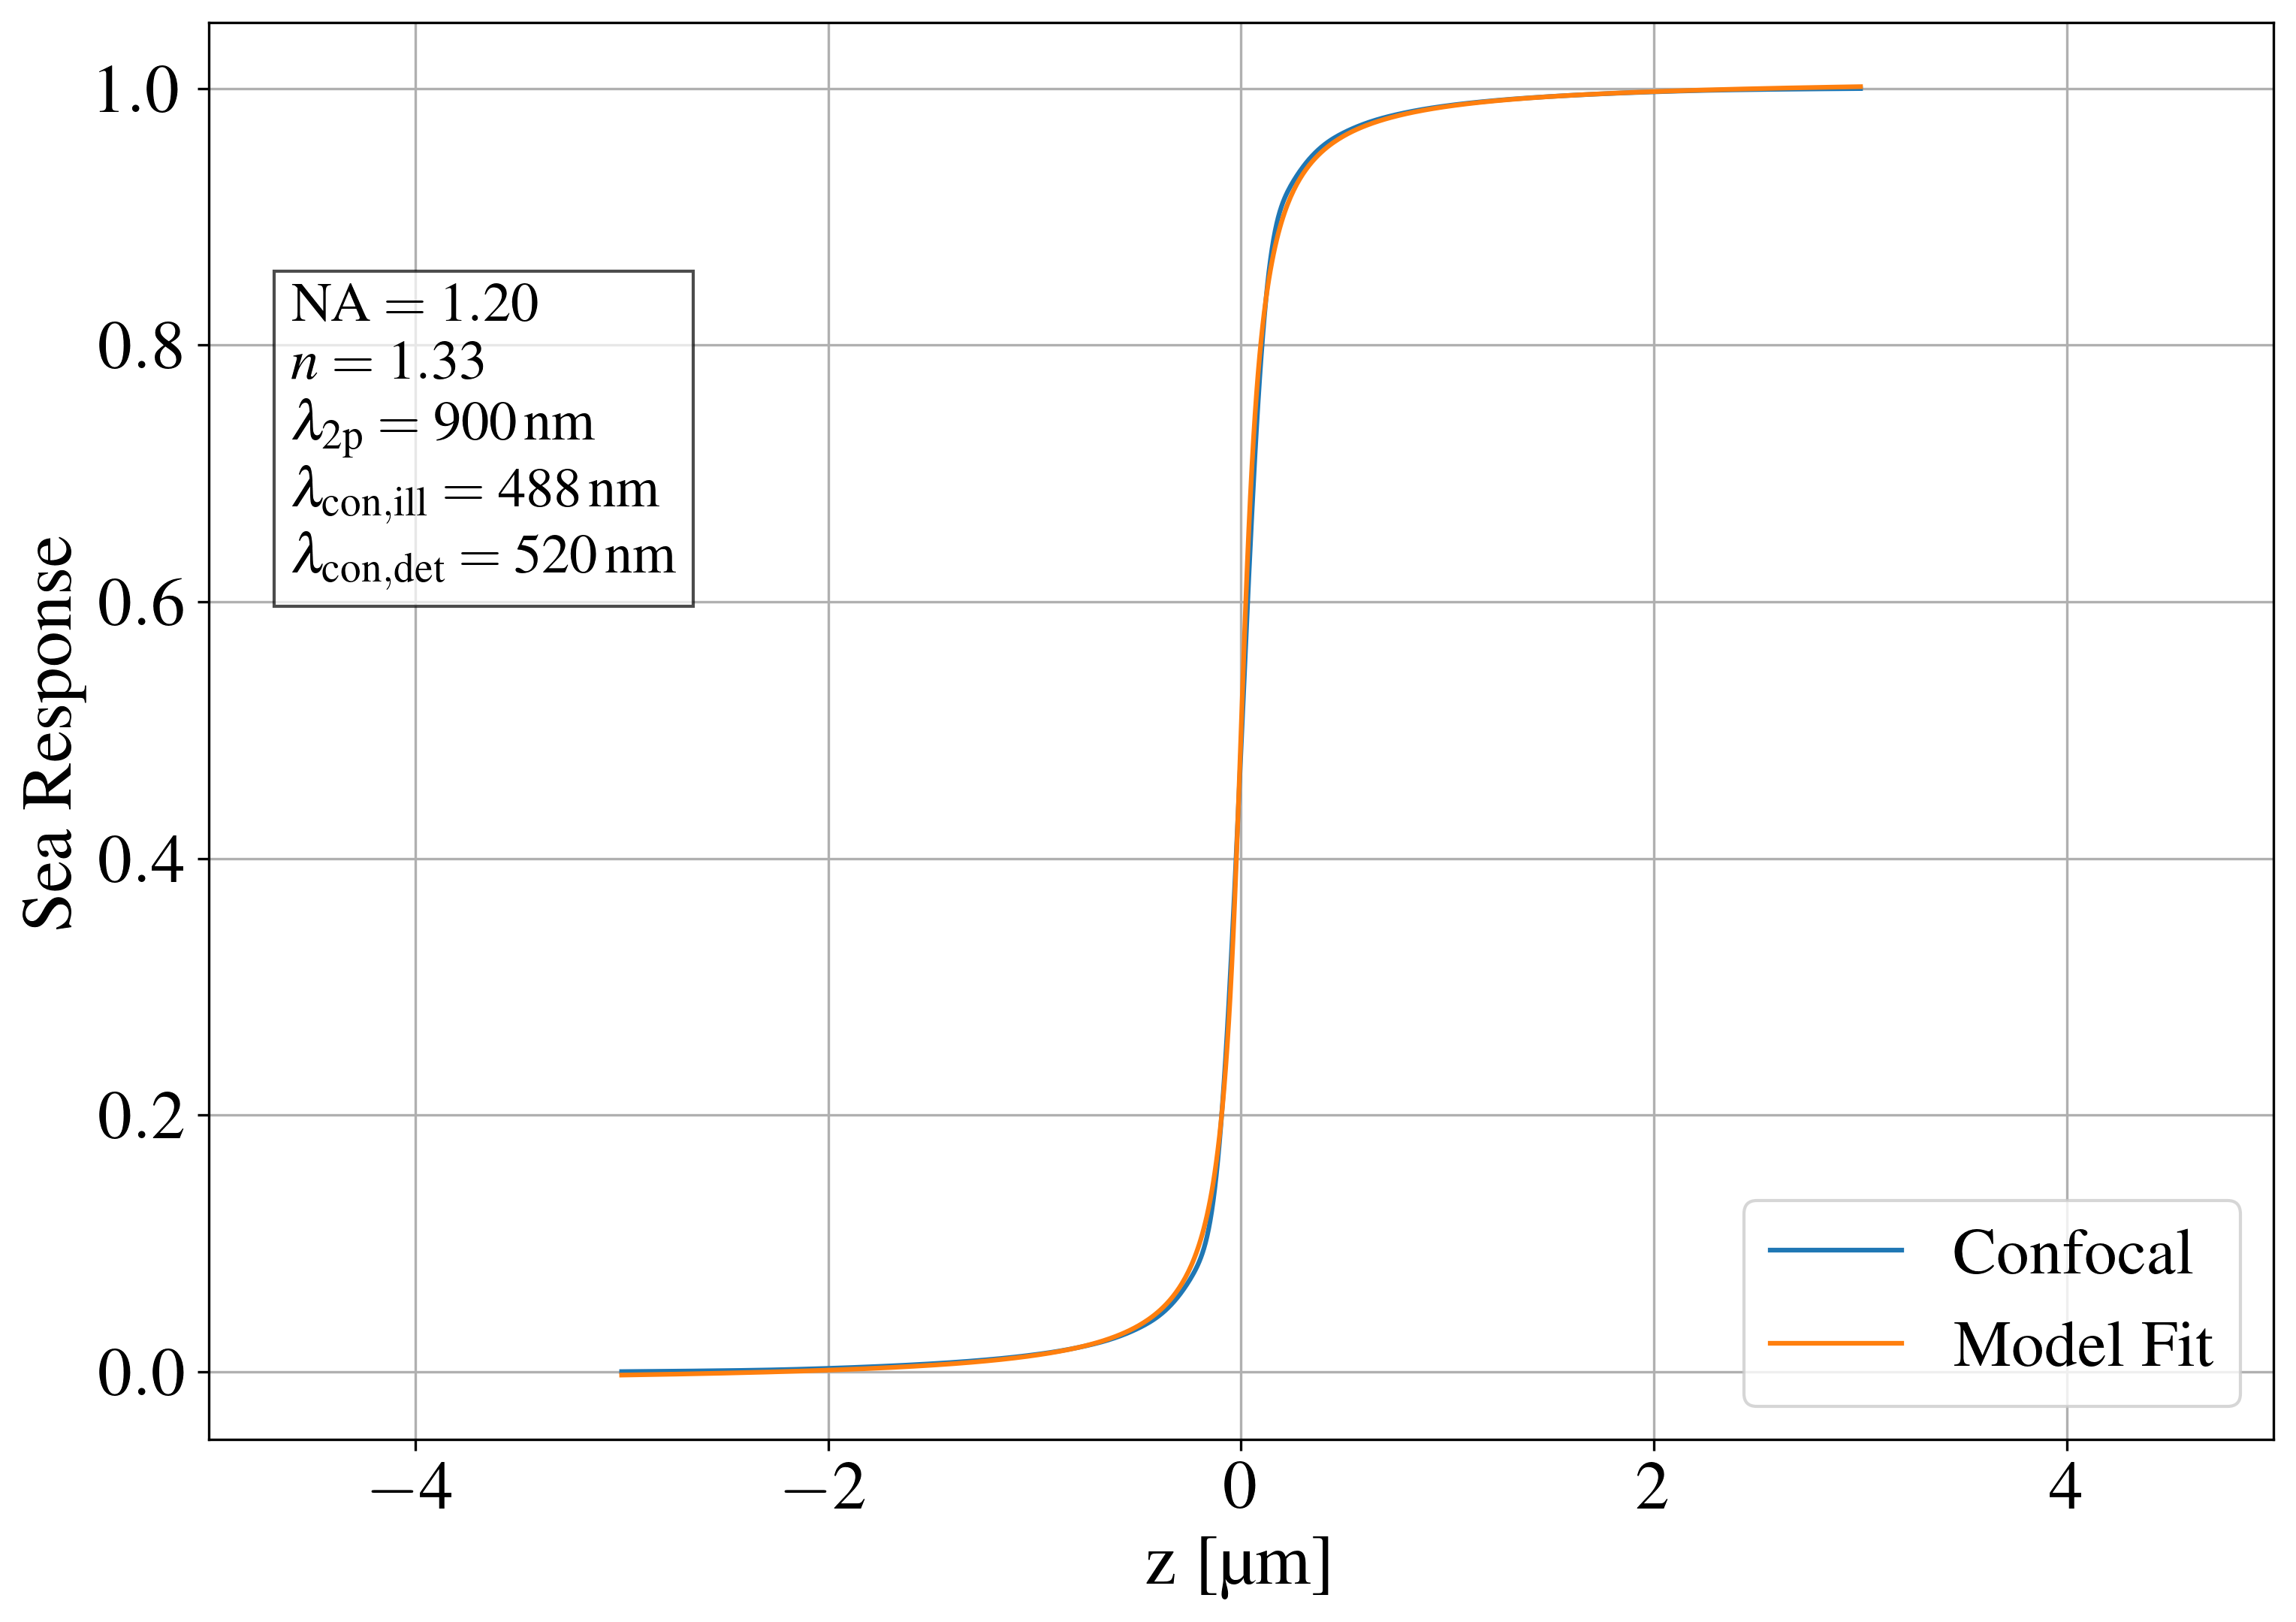

In [43]:
fig, ax =plt.subplots(figsize=(10,7),layout='constrained', frameon=True)

plt.plot(z_array,sea_response_confocal,label='Confocal')
plt.plot(z_array,model_func_sea_response(z_array,*popt),label='Model Fit')


plt.legend(loc='lower right')
plt.xlabel(r'z [\textmu m]')
plt.ylabel(r'Sea Response')
boxcontent = '\n'.join((
    r'$\mathrm{NA}=%.2f$' % (num_ap, ),
    r'$n=%.2f$' % (ref_index, ),
    r'$\lambda_{\mathrm{2p}}=%.0f\,\mathrm{nm}$' % (wl_TPA*10**3, ),
    r'$\lambda_{\mathrm{con,ill}}=%.0f\,\mathrm{nm}$' % (wl_ill*10**3, ),
    r'$\lambda_{\mathrm{con,det}}=%.0f\,\mathrm{nm}$' % (wl_det*10**3, )))
ax.text(0.04, 0.6, boxcontent, transform=ax.transAxes, fontsize=18,
        verticalalignment='bottom', bbox=boxprops)
plt.xlim(-5,5)
#plt.ylim(0,1.1)
plt.grid(visible=True)
#fig.savefig('Sea_Response.svg',bbox_inches='tight')
#fig.savefig('Sea_Response.png',dpi=DPI,bbox_inches='tight')
plt.show()

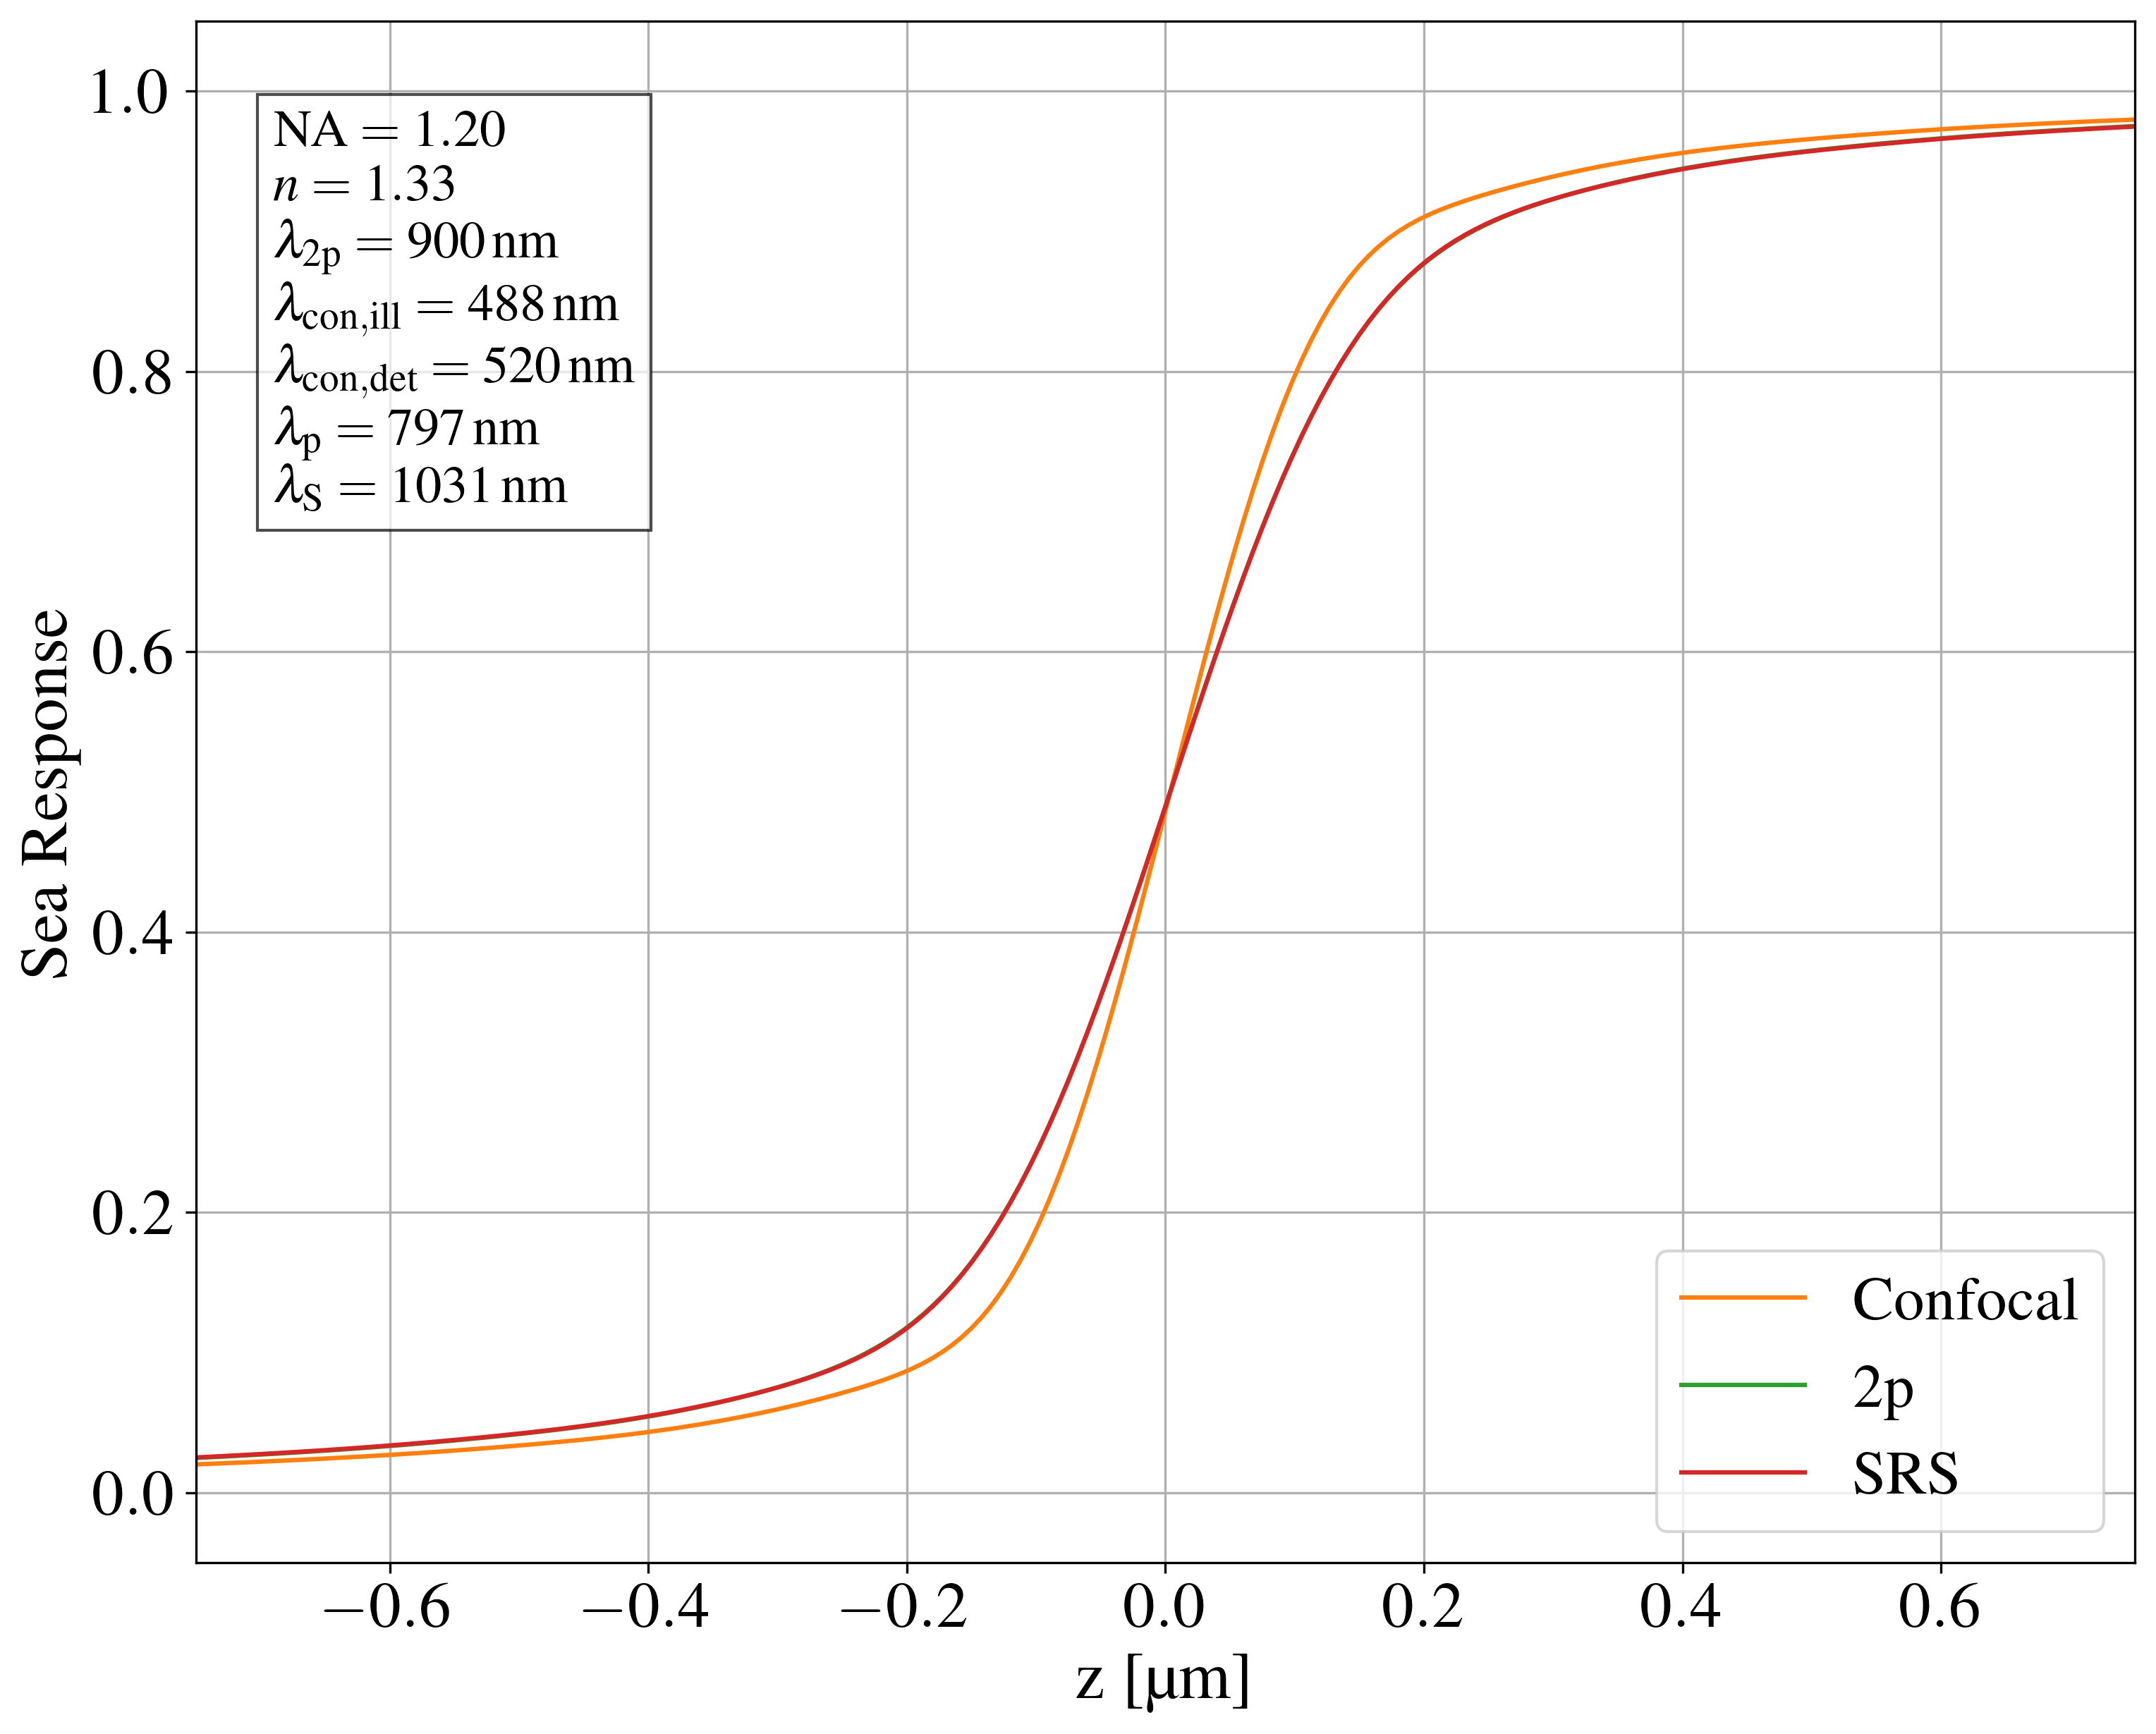

In [50]:
fig, ax =plt.subplots(figsize=(10,8),layout='constrained', frameon=True)

plt.plot(z_array,sea_response_confocal,label='Confocal',color='C1')
plt.plot(z_array,sea_response_2p_conventional,label='2p',color='C2')
plt.plot(z_array,sea_response_srs,label='SRS',color='C3')
#plt.plot(z_array,sea_response_2p_confocal,label='Confocal 2p')


plt.legend(loc='lower right')
plt.xlabel(r'z [\textmu m]')
plt.ylabel(r'Sea Response')
boxcontent = '\n'.join((
    r'$\mathrm{NA}=%.2f$' % (num_ap, ),
    r'$n=%.2f$' % (ref_index, ),
    r'$\lambda_{\mathrm{2p}}=%.0f\,\mathrm{nm}$' % (wl_TPA*10**3, ),
    r'$\lambda_{\mathrm{con,ill}}=%.0f\,\mathrm{nm}$' % (wl_ill*10**3, ),
    r'$\lambda_{\mathrm{con,det}}=%.0f\,\mathrm{nm}$' % (wl_det*10**3, ),
    r'$\lambda_{\mathrm{p}}=%.0f\,\mathrm{nm}$' % (wl_p*10**3, ),
    r'$\lambda_{\mathrm{S}}=%.0f\,\mathrm{nm}$' % (wl_S*10**3, )))

ax.text(0.04, 0.68, boxcontent, transform=ax.transAxes, fontsize=18,
        verticalalignment='bottom', bbox=boxprops)
plt.xlim(-.75,.75)
#plt.ylim(0,1.1)
plt.grid(visible=True)
#fig.savefig(r"C:\Users\dan20\OneDrive - Johann Wolfgang Goethe Universität\Module\Masterarbeit\Tex Dokument\Abbildungen\Sea_Response.pdf",bbox_inches='tight')
#fig.savefig('Sea_Response.png',dpi=DPI,bbox_inches='tight')
plt.show()

In [45]:
def mask_outliers_stack(data_stack, threshold=2.0):
    """
    Masks outliers in a stack of 2D arrays using the z-score method.

    Parameters:
    - data_stack (np.ndarray): 3D array of shape (n, h, w), where each [i, :, :] is a 2D array.
    - threshold (float): z-score threshold for masking.

    Returns:
    - masked_stack (np.ma.MaskedArray): Masked array with the same shape.
    """
    if data_stack.ndim != 3:
        raise ValueError("Input must be a 3D array of 2D arrays.")

    # Compute per-slice mean and std
    mean = data_stack.mean(axis=(1, 2), keepdims=True)
    std = data_stack.std(axis=(1, 2), keepdims=True)

    z_scores = (data_stack - mean) / std
    mask = np.abs(z_scores) > threshold

    return np.ma.masked_array(data_stack, mask=mask)

In [46]:
import tifffile as tf
delta_z = 0.15 
z_stacks = tf.imread(r"C:\Users\dan20\OneDrive - Johann Wolfgang Goethe Universität\Module\Masterarbeit\Aufnahmen\22-05 unmixing\22-05 zwiebel\2025-05-22 23-50-36\Acquisition 4\Acquisition_4.tif")
print(z_stacks.shape)
z_stacks_masked = mask_outliers_stack(z_stacks[:,:,:], threshold=2)
mean = np.mean(z_stacks_masked[1:,:,:], axis=(1,2))-np.mean(z_stacks_masked[1,:,:])
mean = mean/np.max(mean)
error = np.std(z_stacks_masked[1:,:,:], axis=(1,2))/150/np.max(mean)
#error = np.max((np.abs(np.mean(z_stacks[:,:,:], axis=(1,2))-np.max(z_stacks[:,:,:])), np.abs(np.mean(z_stacks[:,:,:], axis=(1,2))-np.min(z_stacks[:,:,:]))))/10
z_array2 = np.arange(-30, 650, delta_z )+21.5

(382, 256, 256)


In [47]:
initial_guess = np.array([1,1,1,1,1,0,0]) #initial guess for the parameters
#bounds = sp.optimize.Bounds([-np.inf, -np.inf, 0,0,0,0,0], [np.inf]*7)
first_value=0
last_value=110 
popt,pcov=sp.optimize.curve_fit(model_func_absorption, z_array2[first_value:last_value], mean[first_value:last_value], sigma=error[first_value:last_value],p0=initial_guess)
print(popt)
reduced_chi_squared = chi_squared(z_array2[:len(mean)], mean,model_func_absorption, *popt) / (len(mean[:last_value]) - len(popt))
print(f'reduced_chi_squared:{reduced_chi_squared}')

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1600.

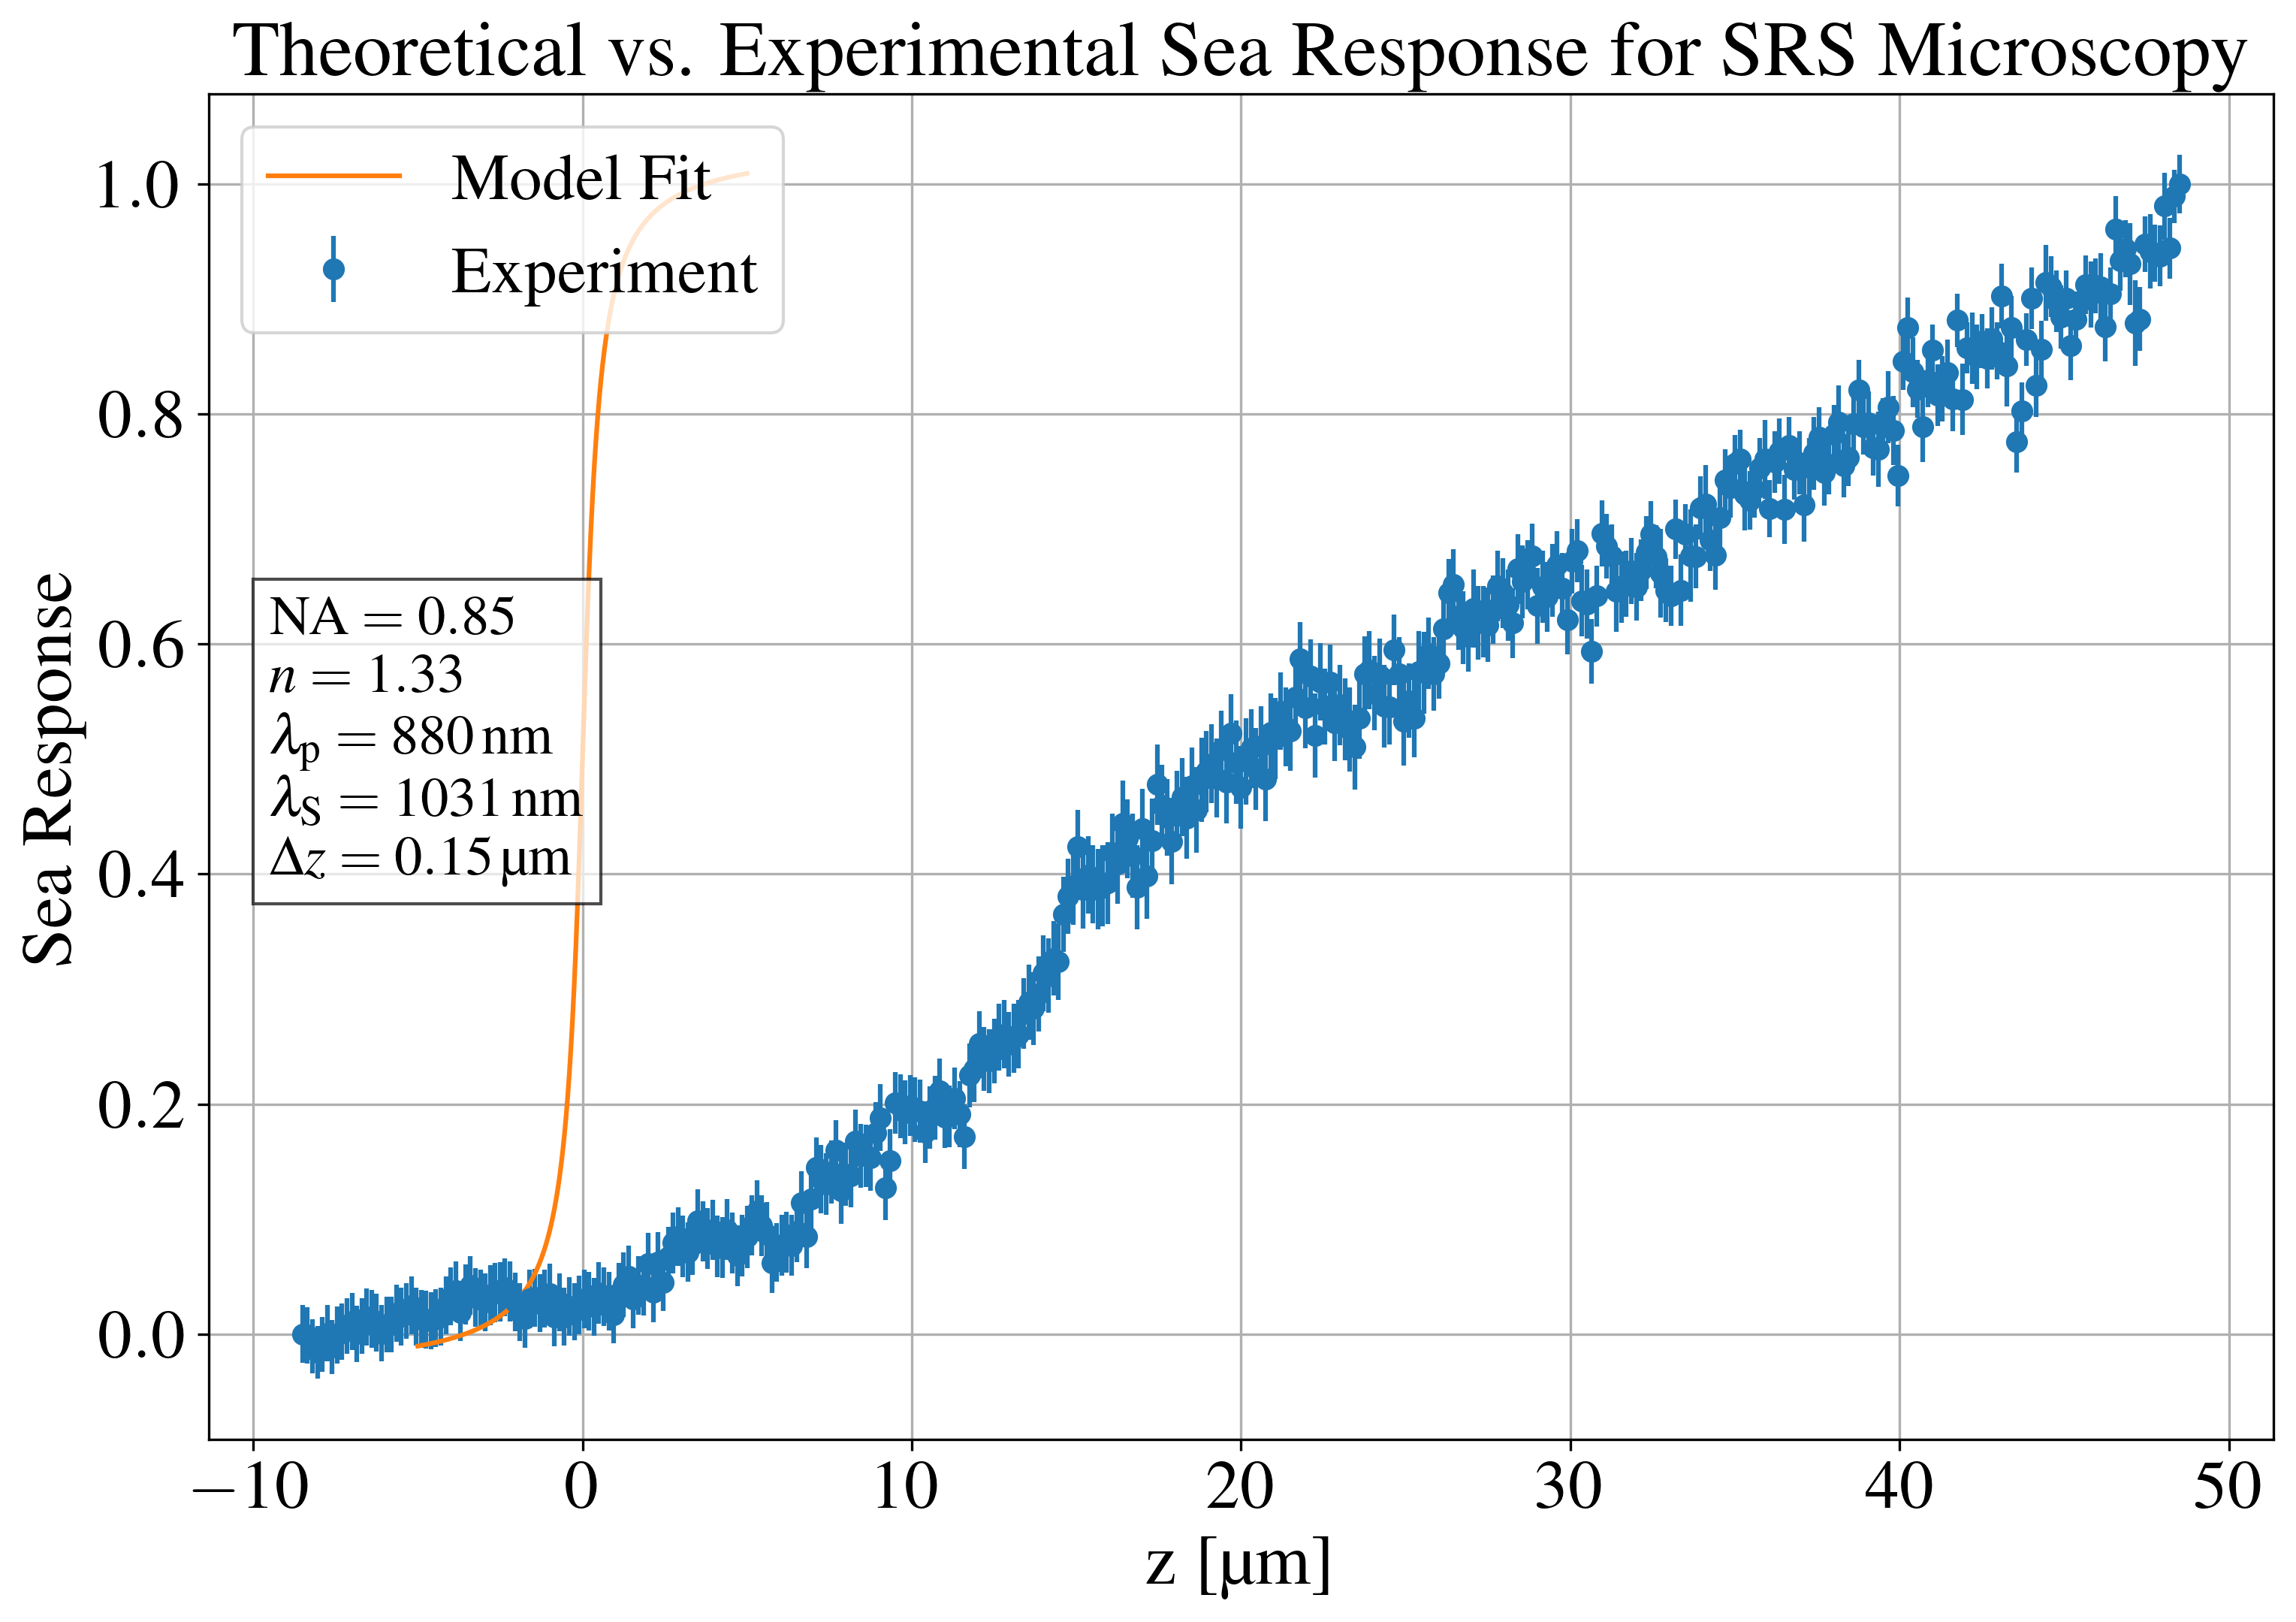

In [ ]:
fig = plt.figure(figsize=(10,7), frameon=True)
boxcontent = '\n'.join((
    r'$\mathrm{NA}=%.2f$' % (num_ap, ),
    r'$n=%.2f$' % (ref_index, ),
    r'$\lambda_{\mathrm{p}}=%.0f\,\mathrm{nm}$' % (wl_p*10**3, ),
    r'$\lambda_{\mathrm{S}}=%.0f\,\mathrm{nm}$' % (wl_S*10**3, ),
    r'$\Delta z=%.2f\,$\textmu m' % (delta_z, )))

plt.text(0.04, 0.35, boxcontent, transform=ax.transAxes, fontsize=18,
        verticalalignment='bottom', bbox=boxprops)
#plt.plot(z_array2[:len(mean)], mean/np.max(mean)*1.1, label='Experiment')
#plt.plot(z_array2[:len(mean)], np.gradient(mean,delta_z)/np.max(np.gradient(mean,delta_z)), label='gradient')
plt.errorbar(z_array2[:len(mean[:])], mean[:], error[:], label='Experiment', fmt='o')
#plt.errorbar(z_array2[:len(mean)], mean/np.max(mean), error/np.max(mean), label='2p', fmt='o')
#plt.plot(z_array,sea_response_srs/np.max(sea_response_srs),label='Theory')
plt.plot(z_array,model_func_sea_response(z_array,*popt),label='Model Fit')
#plt.plot(z_array,np.gradient(model_func_sea_response(z_array,*popt))/np.max(np.gradient(model_func_sea_response(z_array,*popt))))
plt.legend(loc='upper left')
plt.title('Theoretical vs. Experimental Sea Response for SRS Microscopy')
#plt.xlim([-7.5,7.5])
plt.xlabel(r'z [\textmu m]')
plt.ylabel(r'Sea Response')
plt.grid(visible=True)

#plt.plot(z_array,variance)
plt.show()

In [ ]:
popt_zero = np.array([popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6]])
#popt[0]=0
popt_zero[1]=0
sea_response_model_fit=model_func_absorption(z_array,*popt_zero)
sea_response_model_fit=sea_response_model_fit/np.max(sea_response_model_fit)
integrated_int=np.gradient(model_func_sea_response(z_array,*popt_zero),(z_max-z_min)/z_num)
integrated_int=integrated_int/np.max(integrated_int)

IndexError: index 6 is out of bounds for axis 0 with size 6

NameError: name 'sea_response_model_fit' is not defined

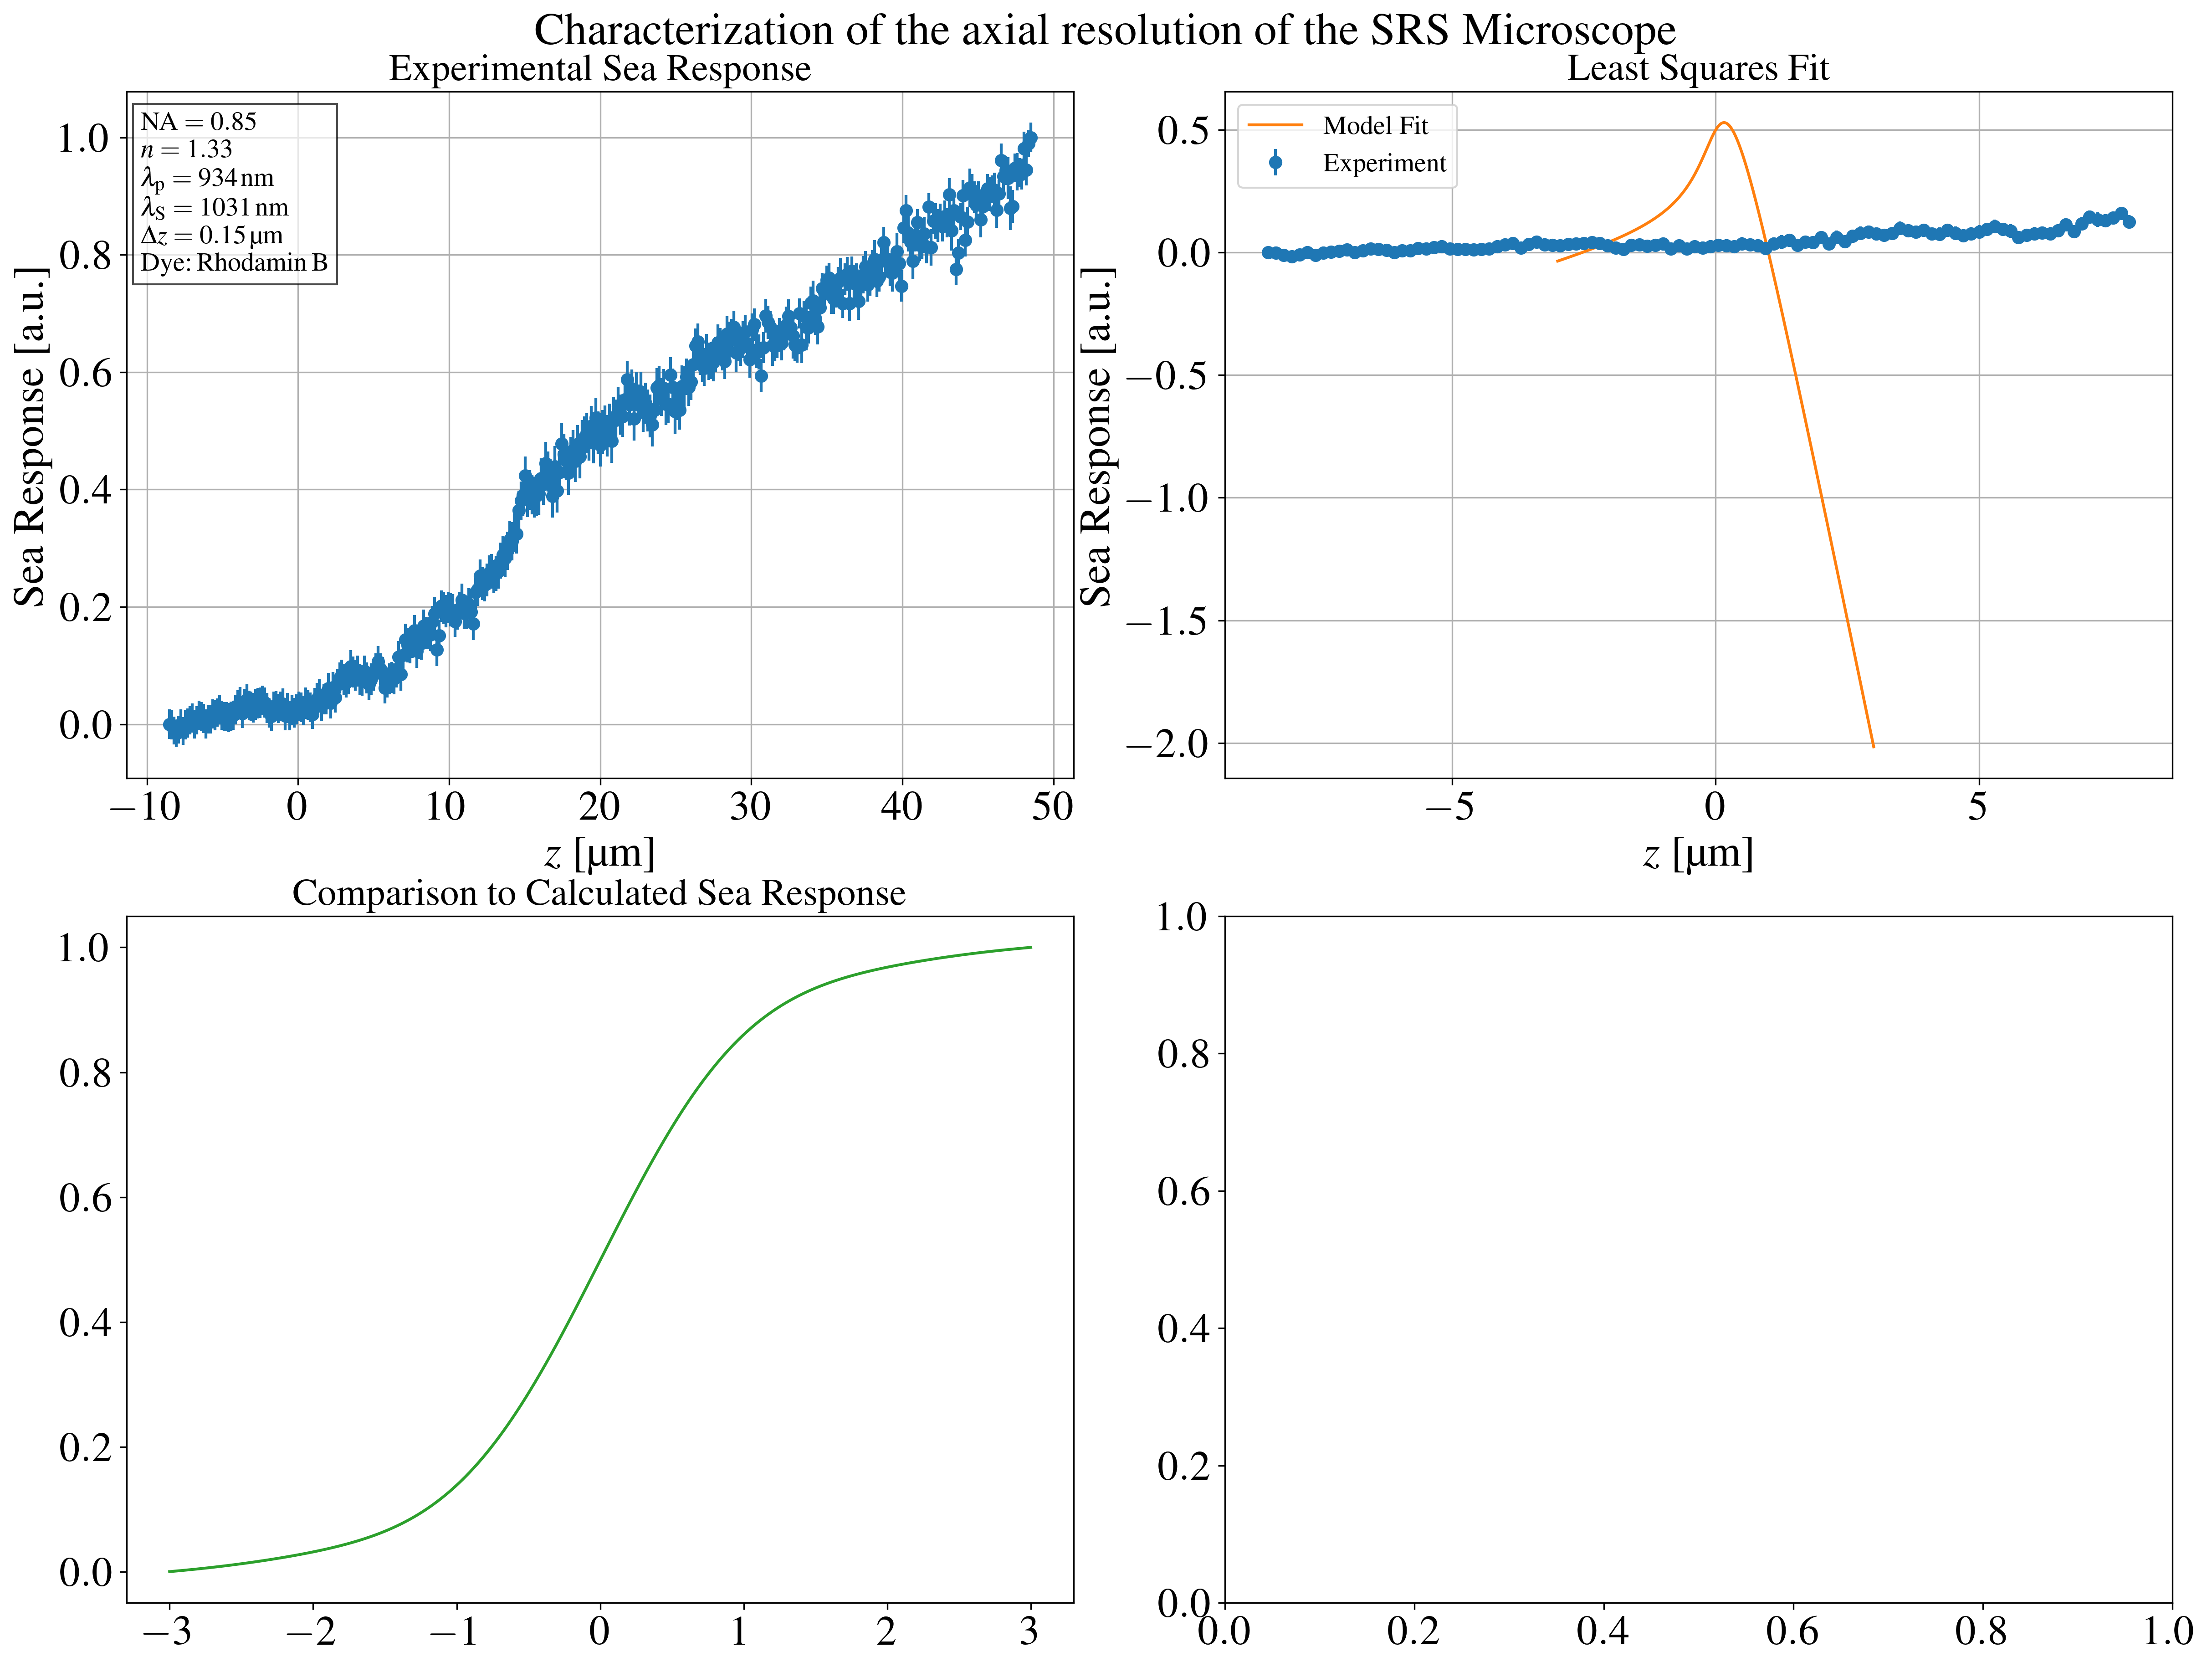

In [ ]:
fig, axs =plt.subplot_mosaic([[0, 1],
                              [2, 3]], layout='constrained',figsize=(16,12))
fig.suptitle('Characterization of the axial resolution of the SRS Microscope', fontsize=24)

ax=axs[0]
ax.set_title(r'Experimental Sea Response', fontsize=20)
ax.errorbar(z_array2[:len(mean)], mean[:], error[:], fmt='o', label='Experiment',color='tab:blue')
boxcontent = '\n'.join((
    r'$\mathrm{NA}=%.2f$' % (num_ap, ),
    r'$n=%.2f$' % (ref_index, ),
    r'$\lambda_{\mathrm{p}}=%.0f\,\mathrm{nm}$' % (wl_p*10**3, ),
    r'$\lambda_{\mathrm{S}}=%.0f\,\mathrm{nm}$' % (wl_S*10**3, ),
    r'$\Delta z=%.2f\,$\textmu m' % (delta_z, ),
    r'$\textrm{Dye:\,Rhodamin\,B}$'))

ax.text(0.015, 1-0.03, boxcontent, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='left', bbox=boxprops)
ax.grid(True)
ax.set_ylabel(r'Sea Response [a.u.]')
ax.set_xlabel(r'$z$ [\textmu m]')

ax=axs[1]
ax.set_title(r'Least Squares Fit', fontsize=20)
ax.errorbar(z_array2[:last_value], mean[:last_value], error[:last_value], label='Experiment', fmt='o',color='tab:blue')
ax.plot(z_array, model_func_absorption(z_array,*popt), label='Model Fit',color='tab:orange')
ax.grid(True)
ax.set_ylabel(r'Sea Response [a.u.]')
ax.set_xlabel(r'$z$ [\textmu m]')
ax.legend(loc='upper left', fontsize=14)
#ax.set_xlim(-5,5)

ax=axs[2]
ax.set_title(r'Comparison to Calculated Sea Response', fontsize=20)
ax.plot(z_array, sea_response_srs, label='Theory', color='tab:green')
ax.plot(z_array, sea_response_model_fit, label='Model Fit', color='tab:orange')
ax.legend(loc='upper left', fontsize=14)
ax.set_xlabel(r'$z$ [\textmu m]')
ax.set_ylabel(r'Sea Response [a.u.]')
ax.grid(visible=True)
ax.set_xlim(-7,7)

ax=axs[3]
#FWHM_axial_fit = 2*z_array[np.isclose(integrated_int, 0.5, 0.04)]#[-1]
#FWHM_axial_theory = 2*z_array[np.isclose(z_planes_srs, 0.5, 0.04)]#[-1]
#boxcontent = '\n'.join((
    #r'$\mathrm{FWHM_{Fit}}=%.2f$ \textmu m' % (FWHM_axial_fit, ),
    #r'$\mathrm{FWHM_{Theory}}=%.2f$ \textmu m' % (FWHM_axial_theory, ),))
#boxprops=dict(boxstyle='square', facecolor='white', alpha=0.7)
#ax.text(0.95, 0.95, boxcontent, transform=ax.transAxes, fontsize=14,
#        verticalalignment='top', horizontalalignment='right', bbox=boxprops)
ax.set_title(r'Gradient of the Sea Response', fontsize=20)
ax.plot(z_array, z_planes_srs, label='Theory', color='tab:green')
ax.plot(z_array, integrated_int, label='Model Fit', color='tab:orange')
ax.legend(loc='upper left',fontsize=14)
ax.set_xlabel(r'$z$ [\textmu m]')
ax.set_ylabel(r'Gradient [a.u.]')
ax.grid(visible=True)
ax.set_xlim(-7,7)
#fig.savefig('sea_response_rhodamin_mosaic.png', bbox_inches='tight')
fig.show()

In [ ]:
import tifffile as tf
delta_z = 0.82
z_stacks = tf.imread(r"C:\Users\dan20\OneDrive - Johann Wolfgang Goethe Universität\Module\Masterarbeit\Aufnahmen\31-03 Aufnahmen\2025-03-31 19-38-38\Acquisition 1.tif")
z_stacks_masked = mask_outliers_stack(z_stacks, threshold=5)
mean = np.mean(z_stacks_masked[:,220:512,200:512], axis=(1,2))-np.mean(z_stacks_masked[0,220:512,200:512])
mean = mean/np.max(mean)
error = np.std(z_stacks_masked[:,220:512,200:512], axis=(1,2))/80/np.max(mean)
#error = np.max((np.abs(np.mean(z_stacks[:,:,:], axis=(1,2))-np.max(z_stacks[:,:,:])), np.abs(np.mean(z_stacks[:,:,:], axis=(1,2))-np.min(z_stacks[:,:,:]))))/10
z_array2 = np.arange(-30, 650, delta_z)

In [ ]:
initial_guess = np.array([1,1,1,1,1,0,0]) #initial guess for the parameters
#bounds = sp.optimize.Bounds([-np.inf, -np.inf, 0,0,0,0,0], [np.inf]*7)
first_value=25
last_value=46
popt,pcov=sp.optimize.curve_fit(model_func_absorption, z_array2[first_value:last_value], mean[first_value:last_value], sigma=error[first_value:last_value],p0=initial_guess)
print(popt)
reduced_chi_squared = chi_squared(z_array2[first_value:last_value], mean[first_value:last_value],model_func_sea_response, *popt) / (len(mean[first_value:last_value]) - len(popt))
print(f'reduced_chi_squared: {reduced_chi_squared}')

[0.39355223 0.06497021 1.33723434 1.48452874 0.03420471 0.
 0.        ]
reduced_chi_squared: 0.01771549835452531


C:\Users\dan20\AppData\Local\Temp\ipykernel_31240\3711943458.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  popt,pcov=sp.optimize.curve_fit(model_func_absorption, z_array2[first_value:last_value], mean[first_value:last_value], sigma=error[first_value:last_value],p0=initial_guess)


In [ ]:
popt_zero = np.array([popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6]])
#popt_zero[0]=0
popt_zero[1]=0
popt_zero[4]=0
z_array3 = np.arange(-5, 5, 0.001)
sea_response_model_fit=model_func_absorption(z_array3,*popt_zero)
sea_response_model_fit=(sea_response_model_fit-np.min(sea_response_model_fit))/np.max(sea_response_model_fit-np.min(sea_response_model_fit))
integrated_int=np.gradient(sea_response_model_fit,(z_max-z_min)/z_num)
integrated_int=integrated_int/np.max(integrated_int)

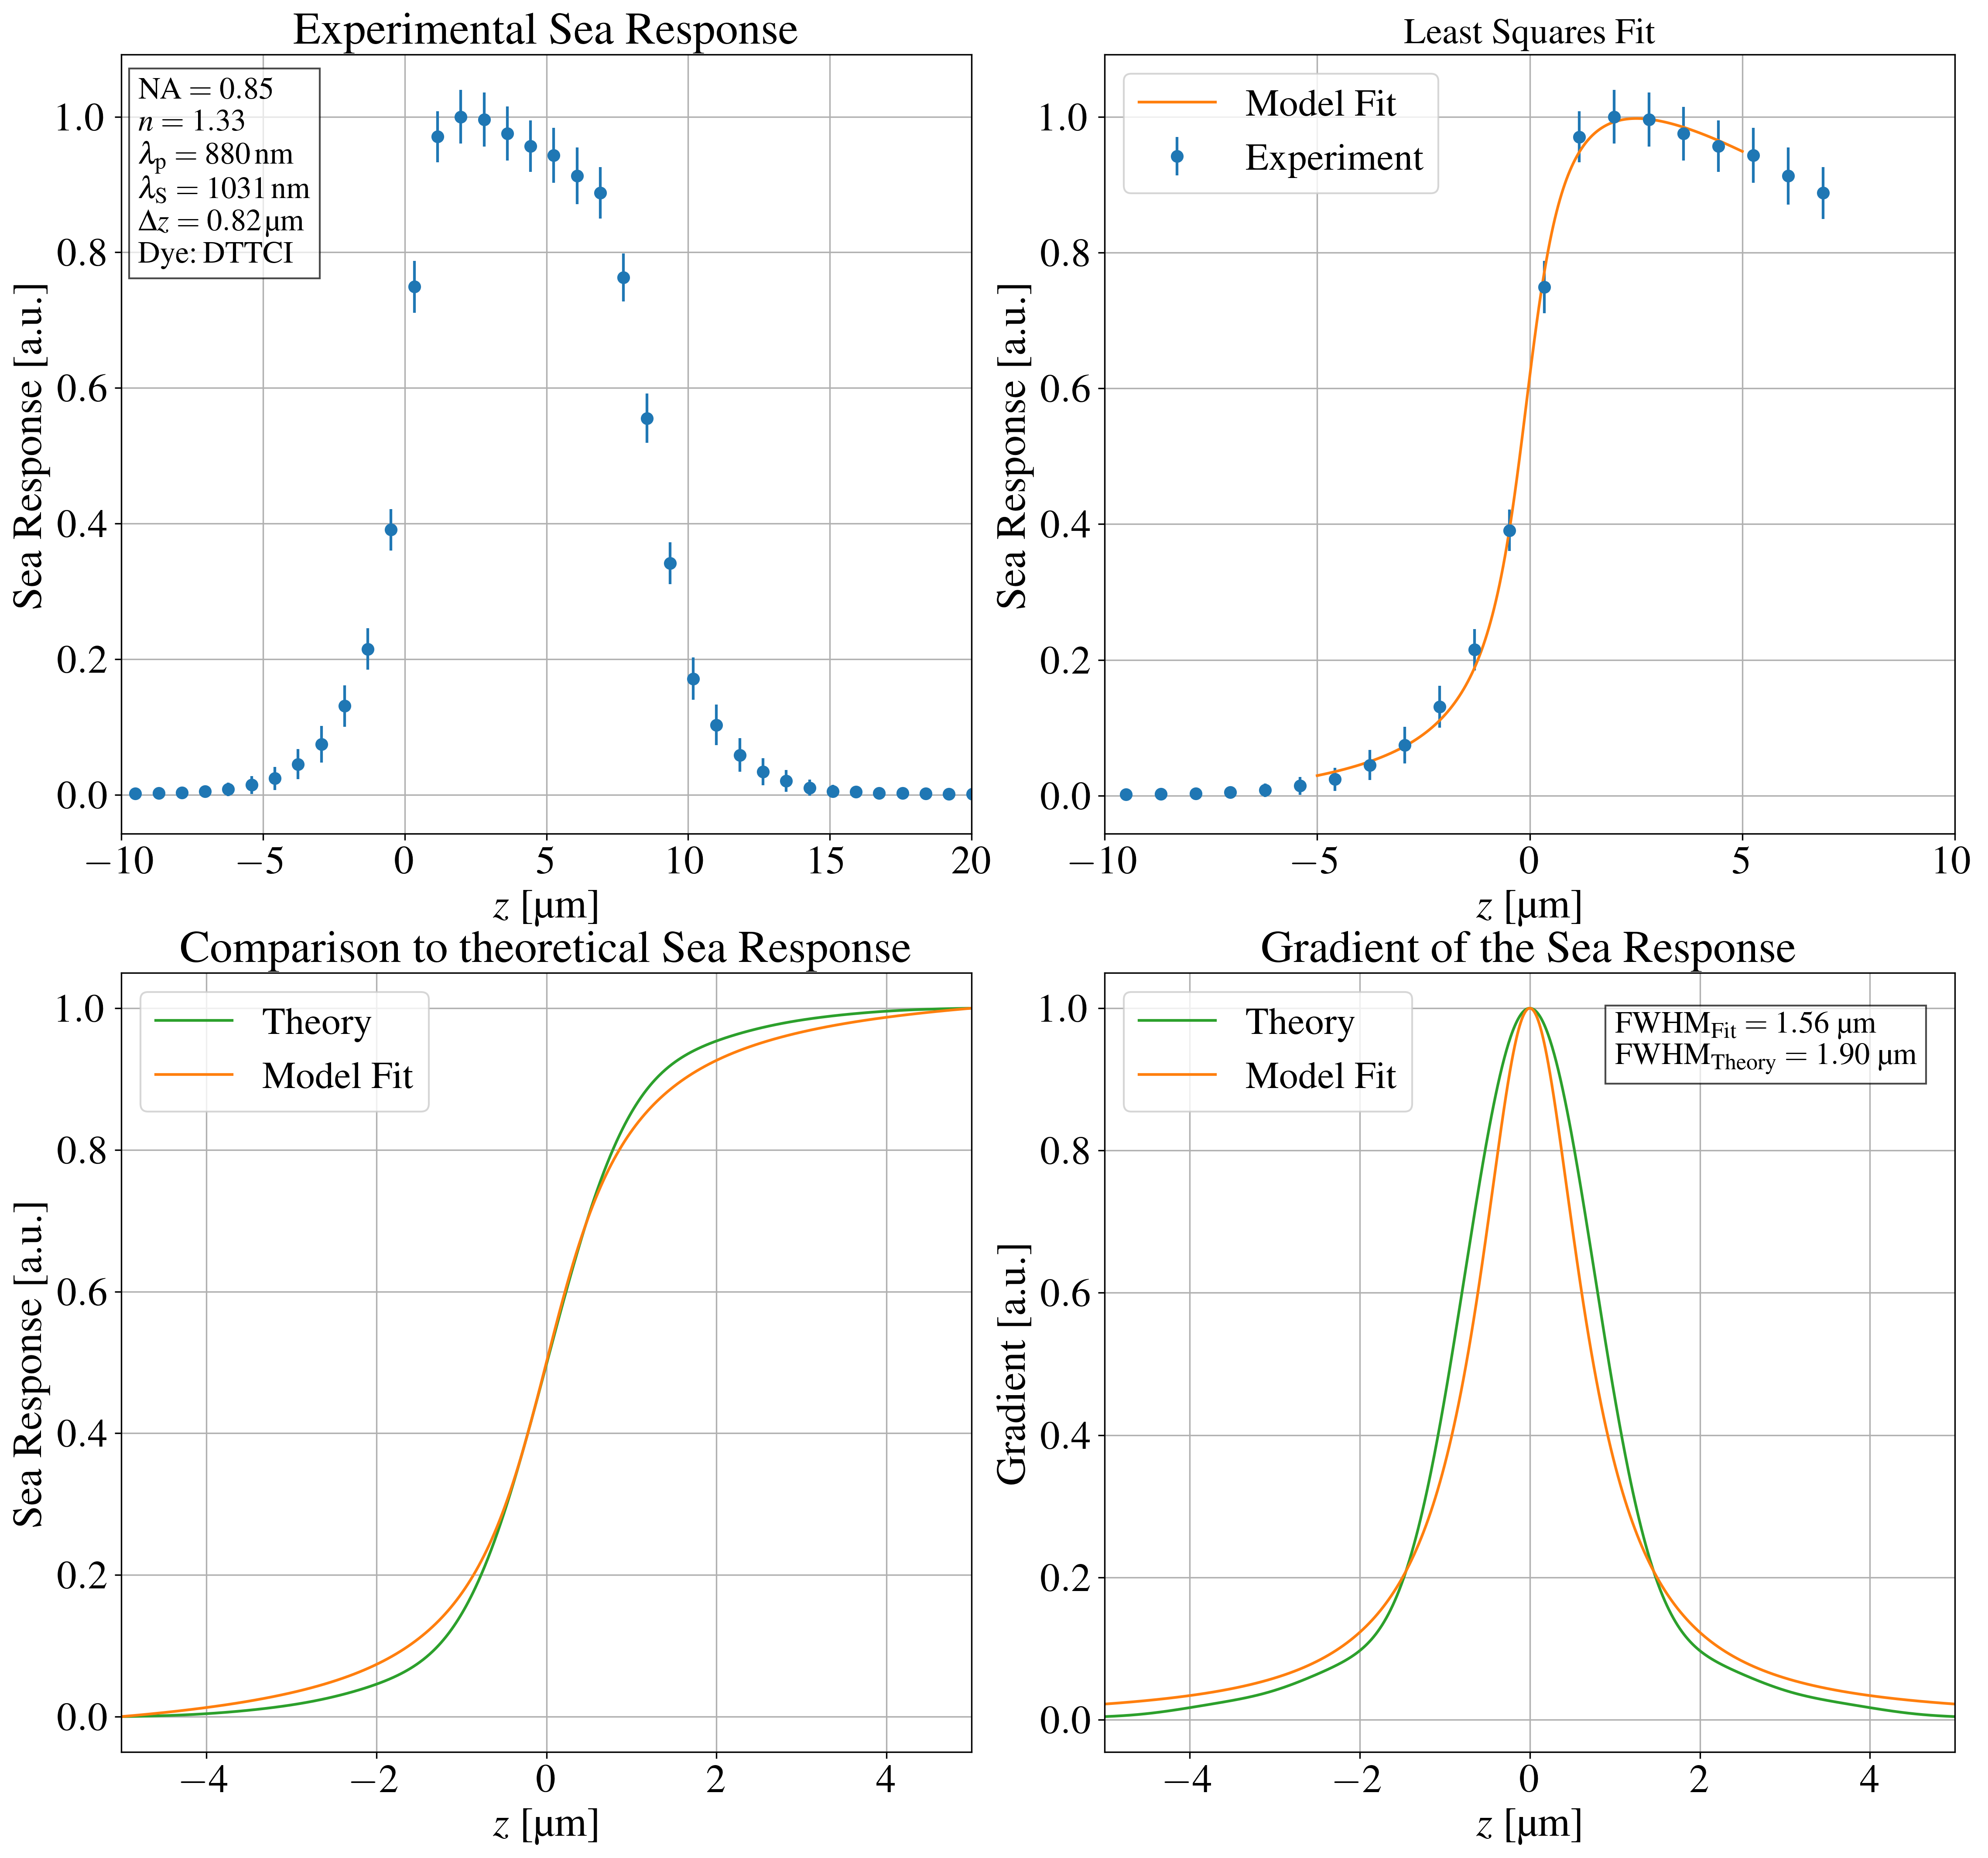

In [ ]:
fig, axs =plt.subplot_mosaic([[0, 1],
                              [2, 3]], layout='constrained',figsize=(15,14))
#fig.suptitle('Characterization of the axial resolution of the SRS Microscope', fontsize=24)

ax=axs[0]
ax.set_title(r'Experimental Sea Response')
ax.errorbar(z_array2[:len(mean)], mean[:], error[:], fmt='o', label='Experiment',color='tab:blue')
boxcontent = '\n'.join((
    r'$\mathrm{NA}=%.2f$' % (num_ap, ),
    r'$n=%.2f$' % (ref_index, ),
    r'$\lambda_{\mathrm{p}}=%.0f\,\mathrm{nm}$' % (wl_p*10**3, ),
    r'$\lambda_{\mathrm{S}}=%.0f\,\mathrm{nm}$' % (wl_S*10**3, ),
    r'$\Delta z=%.2f\,$\textmu m' % (delta_z, ),
    r'$\textrm{Dye:\,DTTCI}$'))
boxprops=dict(boxstyle='square', facecolor='white', alpha=0.7)
ax.text(0.02, 1-0.03, boxcontent, transform=ax.transAxes, fontsize=17,
        verticalalignment='top', horizontalalignment='left', bbox=boxprops)
ax.grid(True)
ax.set_ylabel(r'Sea Response [a.u.]')
ax.set_xlabel(r'$z$ [\textmu m]')
ax.set_xlim(-10,20)



ax=axs[1]
ax.set_title(r'Least Squares Fit', fontsize=20)
ax.errorbar(z_array2[first_value:last_value], mean[first_value:last_value], error[first_value:last_value], label='Experiment', fmt='o',color='tab:blue')
ax.plot(z_array3, model_func_absorption(z_array3,*popt), label='Model Fit', color='tab:orange')
ax.grid(True)
ax.set_ylabel(r'Sea Response [a.u.]')
ax.set_xlabel(r'$z$ [\textmu m]')
ax.legend(loc='upper left')
ax.set_xlim(-10,10)

ax=axs[2]
ax.set_title(r'Comparison to theoretical Sea Response')
ax.plot(z_array, sea_response_srs, label='Theory', color='tab:green')
ax.plot(z_array3, sea_response_model_fit, label='Model Fit', color='tab:orange')
ax.legend(loc='upper left')
ax.set_xlabel(r'$z$ [\textmu m]')
ax.set_ylabel(r'Sea Response [a.u.]')
ax.grid(visible=True)
ax.set_xlim(-5,5)

ax=axs[3]
FWHM_axial_fit = 2*z_array3[np.isclose(integrated_int, 0.5, 0.04)][-1]
FWHM_axial_theory = 2*z_array[np.isclose(z_planes_srs, 0.5, 0.04)][-1]
boxcontent = '\n'.join((
    r'$\mathrm{FWHM_{Fit}}=%.2f$ \textmu m' % (FWHM_axial_fit, ),
    r'$\mathrm{FWHM_{Theory}}=%.2f$ \textmu m' % (FWHM_axial_theory, ),))
boxprops=dict(boxstyle='square', facecolor='white', alpha=0.7)
ax.text(0.60, 0.95, boxcontent, transform=ax.transAxes, fontsize=17,
        verticalalignment='top', horizontalalignment='left', bbox=boxprops)
ax.set_title(r'Gradient of the Sea Response')
ax.plot(z_array, z_planes_srs, label='Theory', color='tab:green')
ax.plot(z_array3, integrated_int, label='Model Fit', color='tab:orange')
#ax.plot(z_array,np.exp(-(z_array**2/popt[2]**2)), label='Gauss with parameter', color='tab:red')
ax.legend(loc='upper left')
ax.set_xlabel(r'$z$ [\textmu m]')
ax.set_ylabel(r'Gradient [a.u.]')
ax.grid(visible=True)
ax.set_xlim(-5,5)
#fig.savefig(r'C:\Users\dan20\OneDrive - Johann Wolfgang Goethe Universität\Module\Masterarbeit\Tex Dokument\Abbildungen\sea_response_DTTCI_mosaic.pdf', bbox_inches='tight')
plt.show()

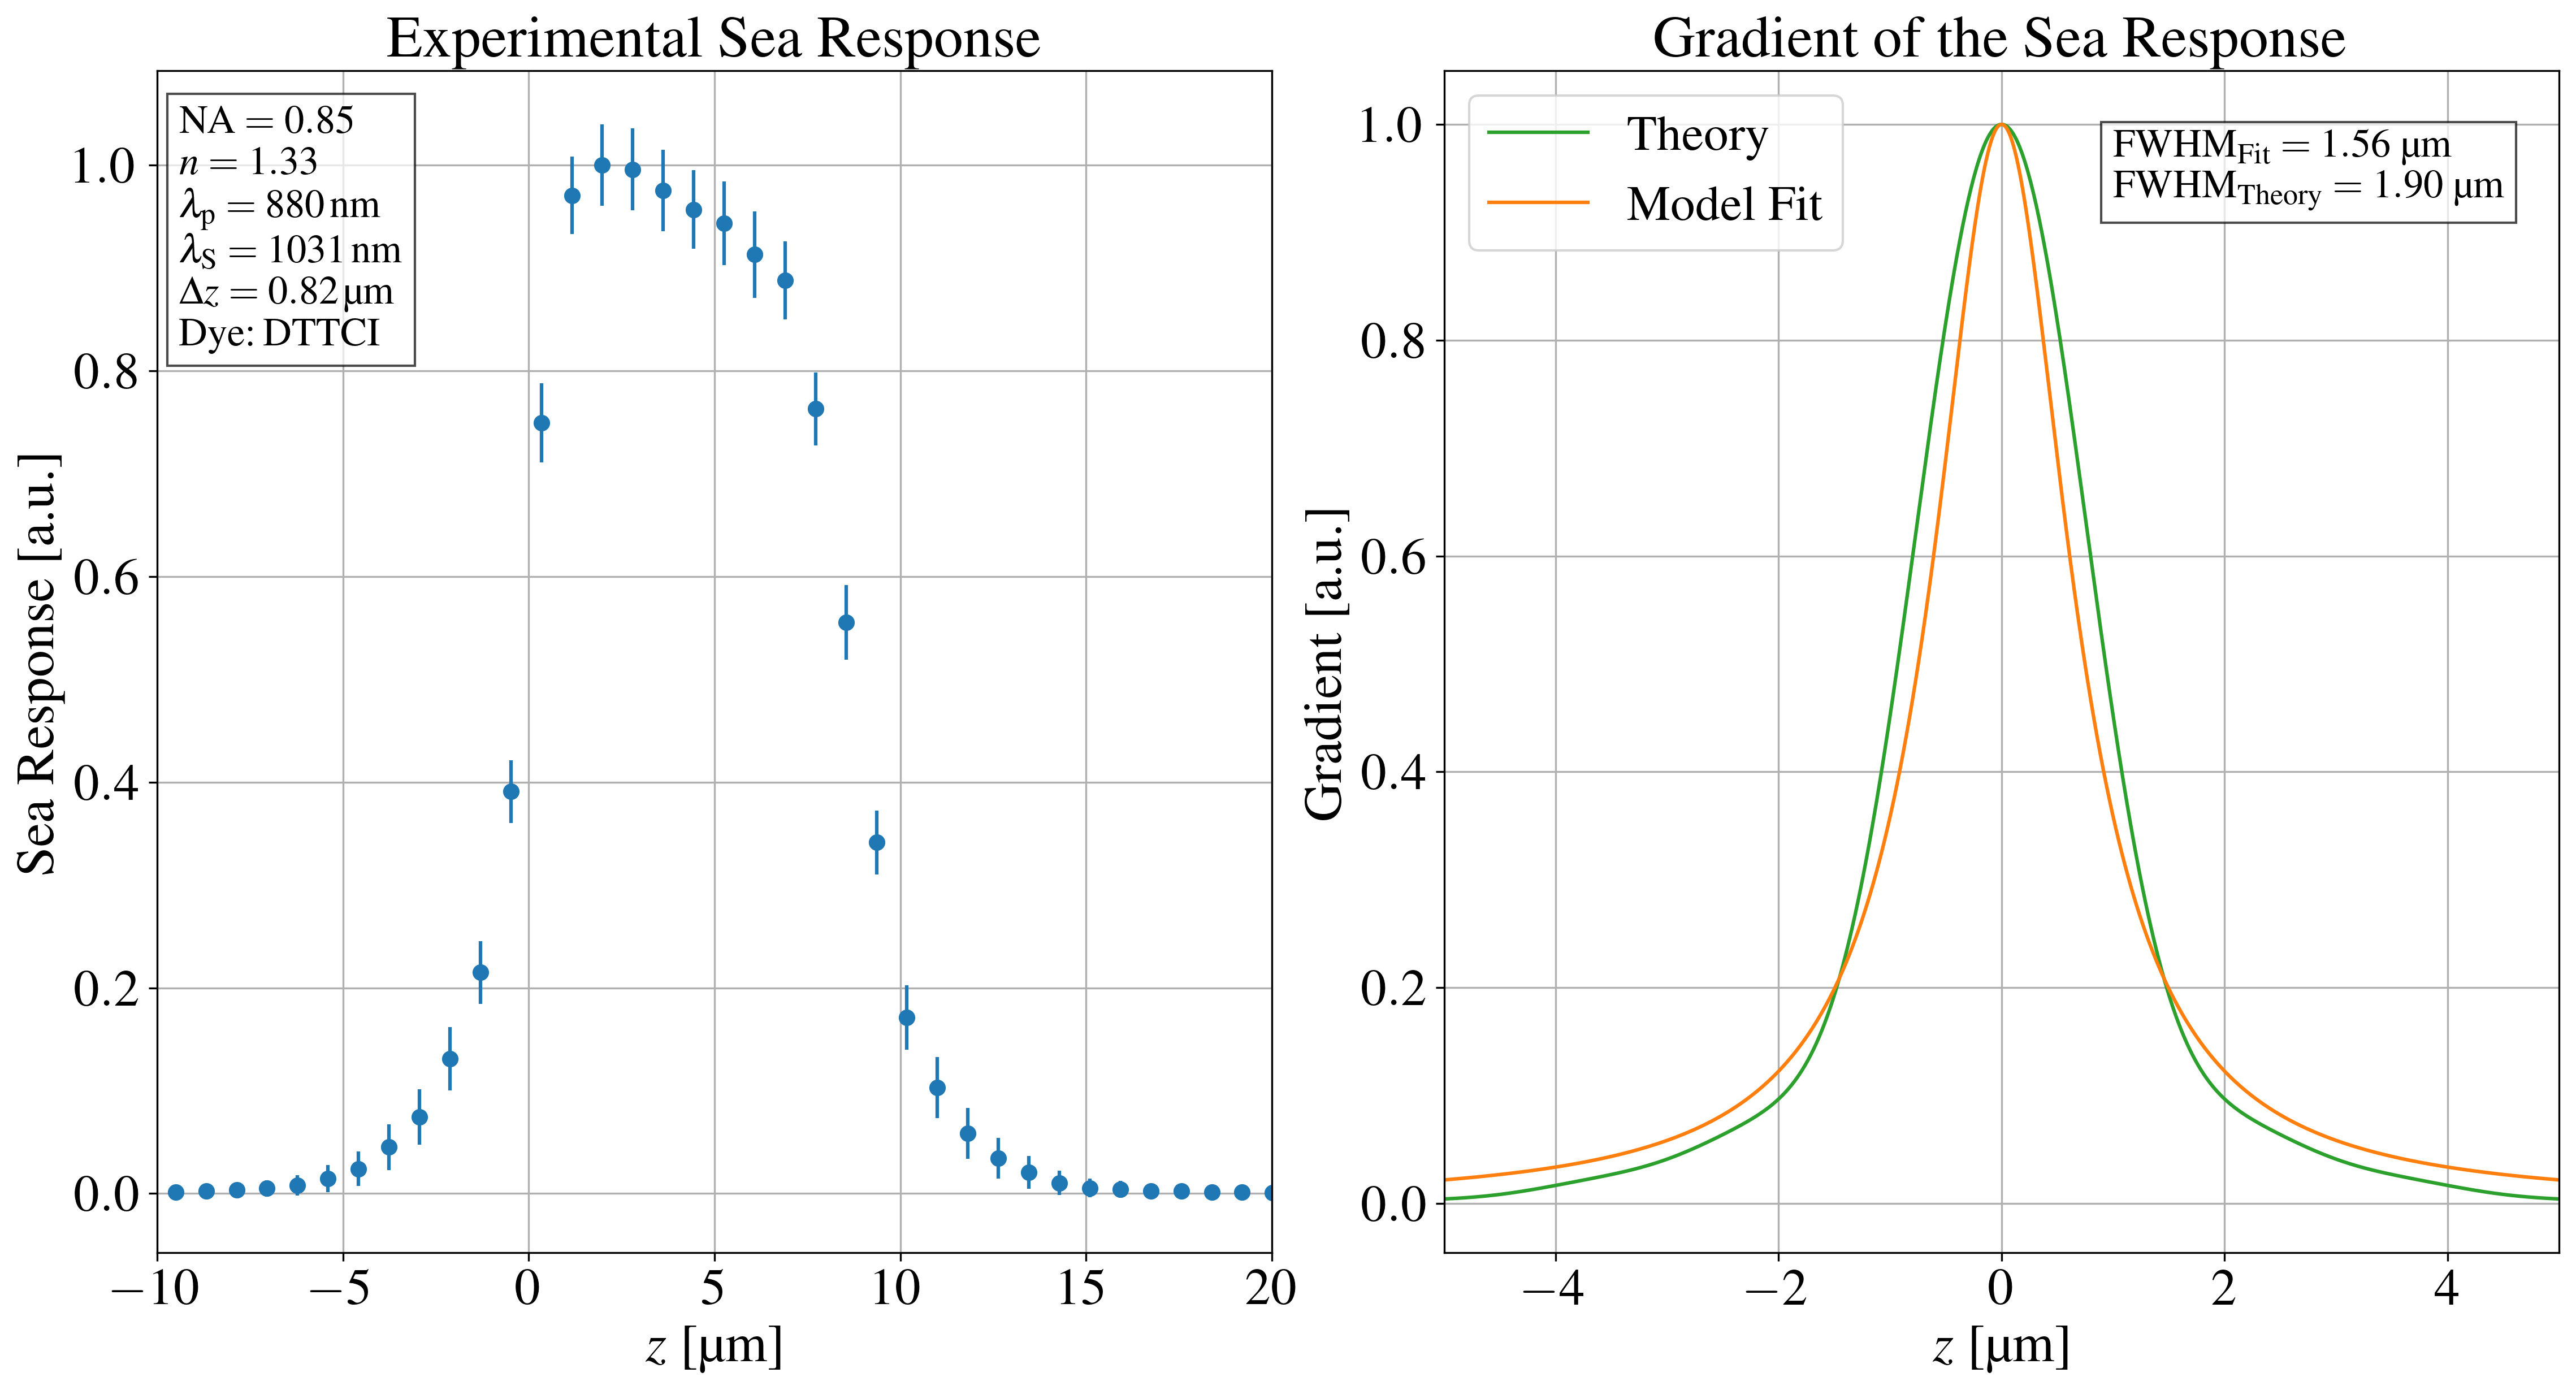

In [ ]:
fig, axs =plt.subplot_mosaic([[0, 1]], layout='constrained',figsize=(15,8))
#fig.suptitle('Characterization of the axial resolution of the SRS Microscope', fontsize=24)

ax=axs[0]
ax.set_title(r'Experimental Sea Response')
ax.errorbar(z_array2[:len(mean)], mean[:], error[:], fmt='o', label='Experiment',color='tab:blue')
boxcontent = '\n'.join((
    r'$\mathrm{NA}=%.2f$' % (num_ap, ),
    r'$n=%.2f$' % (ref_index, ),
    r'$\lambda_{\mathrm{p}}=%.0f\,\mathrm{nm}$' % (wl_p*10**3, ),
    r'$\lambda_{\mathrm{S}}=%.0f\,\mathrm{nm}$' % (wl_S*10**3, ),
    r'$\Delta z=%.2f\,$\textmu m' % (delta_z, ),
    r'$\textrm{Dye:\,DTTCI}$'))
boxprops=dict(boxstyle='square', facecolor='white', alpha=0.7)
ax.text(0.02, 1-0.03, boxcontent, transform=ax.transAxes, fontsize=17,
        verticalalignment='top', horizontalalignment='left', bbox=boxprops)
ax.grid(True)
ax.set_ylabel(r'Sea Response [a.u.]')
ax.set_xlabel(r'$z$ [\textmu m]')
ax.set_xlim(-10,20)

ax=axs[1]
FWHM_axial_fit = 2*z_array3[np.isclose(integrated_int, 0.5, 0.04)][-1]
FWHM_axial_theory = 2*z_array[np.isclose(z_planes_srs, 0.5, 0.04)][-1]
boxcontent = '\n'.join((
    r'$\mathrm{FWHM_{Fit}}=%.2f$ \textmu m' % (FWHM_axial_fit, ),
    r'$\mathrm{FWHM_{Theory}}=%.2f$ \textmu m' % (FWHM_axial_theory, ),))
boxprops=dict(boxstyle='square', facecolor='white', alpha=0.7)
ax.text(0.60, 0.95, boxcontent, transform=ax.transAxes, fontsize=17,
        verticalalignment='top', horizontalalignment='left', bbox=boxprops)
ax.set_title(r'Gradient of the Sea Response')
ax.plot(z_array, z_planes_srs, label='Theory', color='tab:green')
ax.plot(z_array3, integrated_int, label='Model Fit', color='tab:orange')
#ax.plot(z_array,np.exp(-(z_array**2/popt[2]**2)), label='Gauss with parameter', color='tab:red')
ax.legend(loc='upper left')
ax.set_xlabel(r'$z$ [\textmu m]')
ax.set_ylabel(r'Gradient [a.u.]')
ax.grid(visible=True)
ax.set_xlim(-5,5)
fig.savefig(r'C:\Users\dan20\OneDrive - Johann Wolfgang Goethe Universität\Module\Masterarbeit\Group Seminar\Figures\sea_response_DTTCI_mosaic.png',dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
'''

import os
import skimage as sk
#change default directory to dataset
data_dir = r'C:\Users\dan20\OneDrive - physbio\Dokumente - AK Stelzer Staff\Lehre\DataOpticalSectioning_202406xx\DataOpticalSectioning-3_ex514viertelOptimal\63xRhoBoil'
os.chdir(data_dir)

#get list of all files in directory
list_of_files = os.listdir(path=data_dir)

#list of aperture sizes
AU05 = []


#sort files by aperture sizes
for file in list_of_files:
    if file.startswith('63xRhoBoil0.5AU') and file.endswith('.tif'):
        AU05.append(file)


#initialize arrays for intensity and standard deviation
intensity_z_AU05 = np.empty((len(AU05)))
error_z_AU05 = np.empty((len(AU05)))

#import images and perform averaging
i=0
for file in AU05:
    file_dir = data_dir + '\\' + str(file)
    #print(file_dir)
    image = sk.io.imread(file_dir,plugin='pil')
    intensity_z_AU05[i] = np.mean(image)
    error_z_AU05[i] = np.std(image)/np.sqrt(np.size(image.flatten()))
    i+=1
last_value=230
z_intervals_25x_oil=[0.94,1.34,2.42,4.74,9.50]
z_intervals_63x_oil=[0.27,0.44,0.83,1.64,3.29]
#least squares fit
def model_func_absorption(x,*p):#richards curve
    return p[0]*(np.arctan((x+p[1])*p[2])+p[3])*(1-p[4]*x)
    #return p[0]+(p[1]-p[0])/(1+p[2]*np.exp(-p[3]*(x-p[5])))**(1/p[4])#+p[6]*x
initial_guess = np.array([1,1,1,1,1,1,0]) #initial guess for the parameters
#bounds = sp.optimize.Bounds([-np.inf, -np.inf, 0,0,0,0,0], [np.inf]*7)
z_array=np.arange(0,300,z_intervals_63x_oil[0])
popt,pcov=sp.optimize.curve_fit(model_func_absorption, z_array[:last_value], intensity_z_AU05[:last_value], sigma=error_z_AU05[:last_value],p0=initial_guess)
print(popt)
reduced_chi_squared = chi_squared(z_array[:last_value], intensity_z_AU05[:last_value],model_func_absorption, *popt) / (last_value - len(popt))
print(f'reduced_chi_squared:{reduced_chi_squared}')
sea_response_model_fit=model_func_absorption(z_array,*popt_zero)


#print(z_array)
fig = plt.figure(figsize=(10,7), frameon=True)
z_array[:len(intensity_z_AU05)]
plt.errorbar(z_array[:last_value], y=intensity_z_AU05[:last_value], yerr=error_z_AU05[:last_value], fmt='o', markersize=1, capsize=3)
plt.plot(z_array, model_func_absorption(z_array,*popt), label='Model Fit',color='tab:orange')
plt.xlabel(r'z [\textmu m]')
plt.ylabel('Intensity')
plt.xlim(0,80)
plt.grid(visible=True)
plt.title('')

plt.show()
"""

SyntaxError: incomplete input (1220420607.py, line 1)